In [435]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import funciones2 as fs
from turtle import color

In [436]:
df = fs.cargar_dataset("Datos_limpios_Berlin2.csv")
df.head()

Unnamed: 0                   id       scrape_id  \
0           0              2084992  20241221052002   
1           1  1123383729460847373  20241221052002   
2           2  1205255838613758737  20241221052002   
3           3              8164759  20241221052002   
4           4             18836877  20241221052002   

                                                name  \
0   Nice and cozy apartment in Kreuzberg, Graefekiez   
1  Furnished room in well equipped serviced apart...   
2     Luxurous game room with private bath in X-Berg   
3                       Beautiful single-room studio   
4                       Unterkunft zentral in Berlin   

                                         description    host_id host_name  \
0  Our cosy two room Apartment (70qm) in a vibrat...    6302373   Andreas   
1  Room in an apartment available. Apartment has ...  206488801   Supriya   
2  Cozy private room in Berlin Mitte with private...   50009901   Gabriel   
3  Experience the “real Berlin” in our small and ...   42115726      Lars   
4  The accommodation has 3 rooms, however, is onl...  131184702      Jana   

  host_response_time host_is_superhost host_has_profile_pic  ...  \
0     within an hour                 f                    t  ...   
1     within an hour                 f                    t  ...   
2     within an hour                 t                    t  ...   
3     within an hour                 f                    t  ...   
4     within an hour                 f                    t  ...   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                       5.0                  4.91                        5.00   
1                       4.7                  4.80                        4.80   
2                       5.0                  4.97                        4.97   
3                       4.8                  5.00                        5.00   
4                       4.7                  4.80                        4.80   

  review_scores_location review_scores_value calculated_host_listings_count  \
0                   4.64                4.82                            1.0   
1                   4.80                4.70                            3.0   
2                   4.94                4.94                            1.0   
3                   4.80                4.70                            1.0   
4                   4.80                4.70                            1.0   

  calculated_host_listings_count_entire_homes  \
0                                         1.0   
1                                         1.0   
2                                         0.0   
3                                         1.0   
4                                         1.0   

  calculated_host_listings_count_private_rooms  \
0                                          0.0   
1                                          2.0   
2                                          1.0   
3                                          0.0   
4                                          0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                          0.0               0.09  
1                                          0.0               3.00  
2                                          0.0               1.60  
3                                          0.0               0.01  
4                                          0.0               3.00  

[5 rows x 54 columns]

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13984 entries, 0 to 13983
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    13984 non-null  int64  
 1   id                                            13984 non-null  int64  
 2   scrape_id                                     13984 non-null  int64  
 3   name                                          13984 non-null  object 
 4   description                                   13984 non-null  object 
 5   host_id                                       13984 non-null  int64  
 6   host_name                                     13984 non-null  object 
 7   host_response_time                            13984 non-null  object 
 8   host_is_superhost                             13984 non-null  object 
 9   host_has_profile_pic                          13984 non-null 

## Conevertir tipo de cuarto a numerica ##

In [438]:
df1 = df.groupby(["room_type"])["room_type"].count()
df1

room_type
Entire home/apt    9515
Hotel room          117
Private room       4306
Shared room          46
Name: room_type, dtype: int64

In [439]:
df["room_type"]= df["room_type"].replace({"Entire home/apt":"1"}, regex=False)
df["room_type"]= df["room_type"].replace({"Private room":"2"}, regex=False)
df["room_type"]= df["room_type"].replace({"Hotel room":"3"}, regex=False)
df["room_type"]= df["room_type"].replace({"Shared room":"4"}, regex=False)

In [440]:
df["room_type"]=df["room_type"].astype(float)

## Convertir superhost a numerica ##

In [441]:
df1 = df.groupby(["host_is_superhost"])["host_is_superhost"].count()
df1

host_is_superhost
f    10860
t     3124
Name: host_is_superhost, dtype: int64

In [442]:
df["host_is_superhost"]= df["host_is_superhost"].replace({"t":"1"}, regex=False)
df["host_is_superhost"]= df["host_is_superhost"].replace({"f":"0"}, regex=False)

In [443]:
df["host_is_superhost"]=df["host_is_superhost"].astype(float)

In [444]:
cualitativas = df.select_dtypes(include=["object","datetime","category"])
cuantitativas = df.select_dtypes(include=["float64","int64","float","int"])

In [445]:
cuantitativas =cuantitativas.drop(columns=["Unnamed: 0"])
cuantitativas.head()

id       scrape_id    host_id  host_is_superhost  \
0              2084992  20241221052002    6302373                0.0   
1  1123383729460847373  20241221052002  206488801                0.0   
2  1205255838613758737  20241221052002   50009901                1.0   
3              8164759  20241221052002   42115726                0.0   
4             18836877  20241221052002  131184702                0.0   

   room_type  host_listings_count  host_total_listings_count   latitude  \
0        1.0                  1.0                        1.0  52.488550   
1        2.0                  7.0                        7.0  52.560900   
2        2.0                  1.0                        1.0  52.504812   
3        1.0                  1.0                        3.0  52.548240   
4        1.0                  1.0                        1.0  52.536470   

   longitude  accommodates  ...  review_scores_cleanliness  \
0  13.414800           2.0  ...                        5.0   
1  13.350000           2.0  ...                        4.7   
2  13.415324           2.0  ...                        5.0   
3  13.357780           2.0  ...                        4.8   
4  13.420490           3.0  ...                        4.7   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.91                         5.00                    4.64   
1                   4.80                         4.80                    4.80   
2                   4.97                         4.97                    4.94   
3                   5.00                         5.00                    4.80   
4                   4.80                         4.80                    4.80   

   review_scores_value  calculated_host_listings_count  \
0                 4.82                             1.0   
1                 4.70                             3.0   
2                 4.94                             1.0   
3                 4.70                             1.0   
4                 4.70                             1.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.0   
1                                          1.0   
2                                          0.0   
3                                          1.0   
4                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           0.0   
1                                           2.0   
2                                           1.0   
3                                           0.0   
4                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                          0.0               0.09  
1                                          0.0               3.00  
2                                          0.0               1.60  
3                                          0.0               0.01  
4                                          0.0               3.00  

[5 rows x 41 columns]

In [446]:
Corr_Factors =cuantitativas.corr()
Corr_Factors.head()

id  scrape_id   host_id  host_is_superhost  \
id                 1.000000        NaN  0.506587          -0.015111   
scrape_id               NaN        NaN       NaN                NaN   
host_id            0.506587        NaN  1.000000          -0.022312   
host_is_superhost -0.015111        NaN -0.022312           1.000000   
room_type         -0.110440        NaN -0.039455          -0.006765   

                   room_type  host_listings_count  host_total_listings_count  \
id                 -0.110440             0.080381                   0.095255   
scrape_id                NaN                  NaN                        NaN   
host_id            -0.039455             0.179473                   0.126223   
host_is_superhost  -0.006765             0.119343                   0.134503   
room_type           1.000000             0.005135                   0.002050   

                   latitude  longitude  accommodates  ...  \
id                -0.014387  -0.035594      0.065180  ...   
scrape_id               NaN        NaN           NaN  ...   
host_id            0.012661  -0.068343      0.054146  ...   
host_is_superhost  0.037613  -0.028555      0.066543  ...   
room_type         -0.039908   0.010949     -0.355645  ...   

                   review_scores_cleanliness  review_scores_checkin  \
id                                 -0.018293              -0.074355   
scrape_id                                NaN                    NaN   
host_id                            -0.056746              -0.105571   
host_is_superhost                   0.197057               0.136649   
room_type                           0.017469               0.035653   

                   review_scores_communication  review_scores_location  \
id                                   -0.056183               -0.005646   
scrape_id                                  NaN                     NaN   
host_id                              -0.129840               -0.063968   
host_is_superhost                     0.166884                0.022902   
room_type                            -0.000746               -0.014564   

                   review_scores_value  calculated_host_listings_count  \
id                           -0.003173                        0.097232   
scrape_id                          NaN                             NaN   
host_id                      -0.088898                        0.187494   
host_is_superhost             0.056369                        0.136908   
room_type                     0.063696                        0.032555   

                   calculated_host_listings_count_entire_homes  \
id                                                    0.122982   
scrape_id                                                  NaN   
host_id                                               0.094549   
host_is_superhost                                     0.081000   
room_type                                            -0.537508   

                   calculated_host_listings_count_private_rooms  \
id                                                    -0.113059   
scrape_id                                                   NaN   
host_id                                               -0.109831   
host_is_superhost                                      0.018810   
room_type                                              0.723650   

                   calculated_host_listings_count_shared_rooms  \
id                                                         NaN   
scrape_id                                                  NaN   
host_id                                                    NaN   
host_is_superhost                                          NaN   
room_type                                                  NaN   

                   reviews_per_month  
id                          0.361431  
scrape_id                        NaN  
host_id                     0.262936  
host_is_superhost           0.165588  
room_type                  -0.062394  

[

In [447]:
Corr_Factors = abs(Corr_Factors)
Corr_Factors.head()

id  scrape_id   host_id  host_is_superhost  \
id                 1.000000        NaN  0.506587           0.015111   
scrape_id               NaN        NaN       NaN                NaN   
host_id            0.506587        NaN  1.000000           0.022312   
host_is_superhost  0.015111        NaN  0.022312           1.000000   
room_type          0.110440        NaN  0.039455           0.006765   

                   room_type  host_listings_count  host_total_listings_count  \
id                  0.110440             0.080381                   0.095255   
scrape_id                NaN                  NaN                        NaN   
host_id             0.039455             0.179473                   0.126223   
host_is_superhost   0.006765             0.119343                   0.134503   
room_type           1.000000             0.005135                   0.002050   

                   latitude  longitude  accommodates  ...  \
id                 0.014387   0.035594      0.065180  ...   
scrape_id               NaN        NaN           NaN  ...   
host_id            0.012661   0.068343      0.054146  ...   
host_is_superhost  0.037613   0.028555      0.066543  ...   
room_type          0.039908   0.010949      0.355645  ...   

                   review_scores_cleanliness  review_scores_checkin  \
id                                  0.018293               0.074355   
scrape_id                                NaN                    NaN   
host_id                             0.056746               0.105571   
host_is_superhost                   0.197057               0.136649   
room_type                           0.017469               0.035653   

                   review_scores_communication  review_scores_location  \
id                                    0.056183                0.005646   
scrape_id                                  NaN                     NaN   
host_id                               0.129840                0.063968   
host_is_superhost                     0.166884                0.022902   
room_type                             0.000746                0.014564   

                   review_scores_value  calculated_host_listings_count  \
id                            0.003173                        0.097232   
scrape_id                          NaN                             NaN   
host_id                       0.088898                        0.187494   
host_is_superhost             0.056369                        0.136908   
room_type                     0.063696                        0.032555   

                   calculated_host_listings_count_entire_homes  \
id                                                    0.122982   
scrape_id                                                  NaN   
host_id                                               0.094549   
host_is_superhost                                     0.081000   
room_type                                             0.537508   

                   calculated_host_listings_count_private_rooms  \
id                                                     0.113059   
scrape_id                                                   NaN   
host_id                                                0.109831   
host_is_superhost                                      0.018810   
room_type                                              0.723650   

                   calculated_host_listings_count_shared_rooms  \
id                                                         NaN   
scrape_id                                                  NaN   
host_id                                                    NaN   
host_is_superhost                                          NaN   
room_type                                                  NaN   

                   reviews_per_month  
id                          0.361431  
scrape_id                        NaN  
host_id                     0.262936  
host_is_superhost           0.165588  
room_type                   0.062394  

[

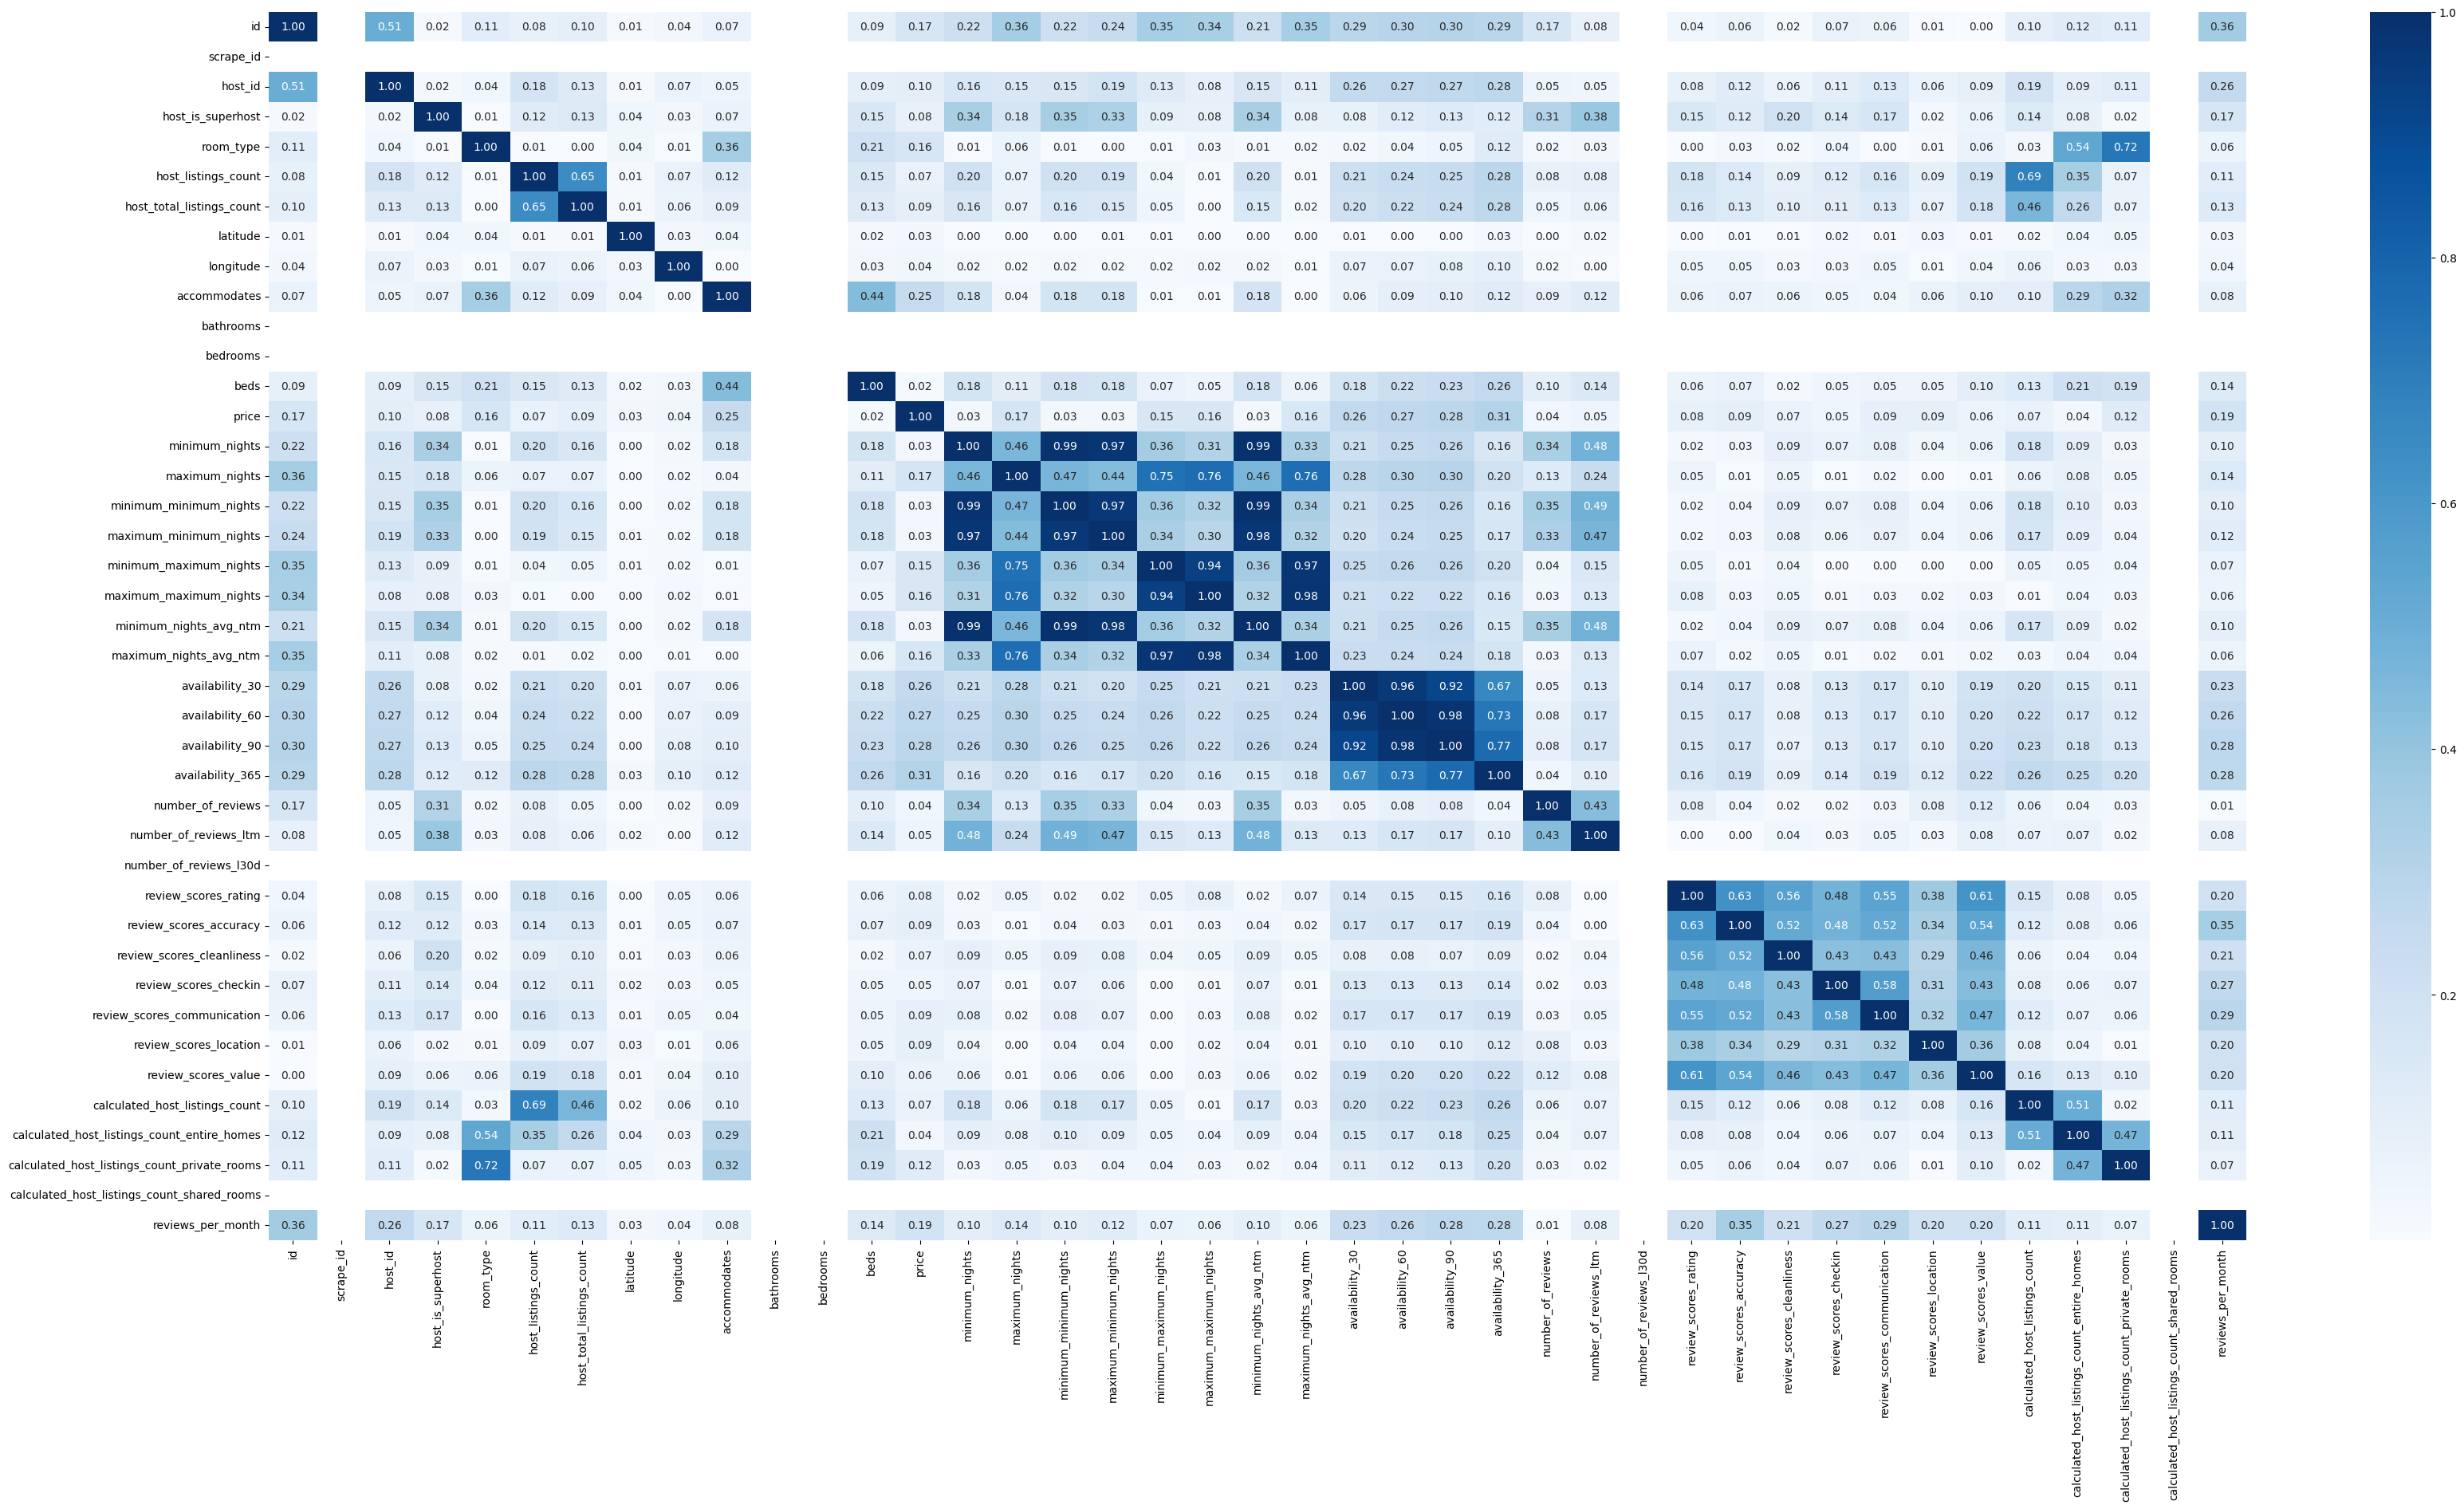

In [448]:
plt.figure(figsize=(40, 20))
Heat_Map_all_room_type = sns.heatmap(Corr_Factors, cmap="Blues", annot=True, fmt=".2f")

### Mejor modelo multiple para las variables host_id, host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month ###

# host_id
La mejor correlación es id 0.51

In [449]:
Vars_Indep= cuantitativas[["id", "availability_365","availability_90"]]
Var_Dep= cuantitativas["host_id"]

In [450]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [451]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de dterminacion es ",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlacion es ",coef_Correl)

El coeficiente de dterminacion es  0.25663026734588146
El coeficiente de correlacion es  0.5065868803530955


La correlación se quedó practicamente igual 

# host_is_superhost
la correlación más alta es number_of_reviews_ltm 0.38

In [452]:
Vars_Indep= cuantitativas[["number_of_reviews_ltm", "minimum_minimum_nights","minimum_nights"]]
Var_Dep= cuantitativas["host_is_superhost"]

In [453]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [454]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de dterminacion es ",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlacion es ",coef_Correl)

El coeficiente de dterminacion es  0.1799967498400089
El coeficiente de correlacion es  0.424260238344355


El coeficiente mejoró de 0.38 a 0.42 lo que es una correlación moderada

# host_total_listings_count
La mejor correlación es host_listings_count 0.65

In [455]:
Vars_Indep= cuantitativas[["host_listings_count", "calculated_host_listings_count","availability_365"]]
Var_Dep= cuantitativas["host_total_listings_count"]

In [456]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [457]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de dterminacion es ",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlacion es ",coef_Correl)

El coeficiente de dterminacion es  0.4267326276769313
El coeficiente de correlacion es  0.653247753671554


La correlación se mantuvo practimanete igual. 

# room_type
La correlación más alta es calculated_host_listings_count_private_rooms 0.72

In [458]:
Vars_Indep= cuantitativas[["calculated_host_listings_count_private_rooms", "calculated_host_listings_count_entire_homes","accommodates"]]
Var_Dep= cuantitativas["room_type"]

In [459]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [460]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de dterminacion es ",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlacion es ",coef_Correl)

El coeficiente de dterminacion es  0.581438451663408
El coeficiente de correlacion es  0.7625211155524863


El coeficiente mejoró de 0.74 a 0.76 lo cual es una correlación buena 

# accommodates
la mejor correlación es beds 0.44

In [461]:
Vars_Indep= cuantitativas[["beds", "room_type","calculated_host_listings_count_private_rooms"]]
Var_Dep= cuantitativas["accommodates"]

In [462]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [463]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de dterminacion es ",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlacion es ",coef_Correl)

El coeficiente de dterminacion es  0.27256454260685603
El coeficiente de correlacion es  0.5220771423907161


El coeficiente mejoró de 0.44 a 0.52 lo cual es un correlación moderada

# bedrooms
No se puede hacer un modelo porque no hay correlaciones

# price
La correlacion mas alta es availability_365 0.31

In [464]:
Vars_Indep= cuantitativas[["availability_365", "availability_90","availability_60"]]
Var_Dep= cuantitativas["price"]

In [465]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [466]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de dterminacion es ",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlacion es ",coef_Correl)

El coeficiente de dterminacion es  0.10150415128951973
El coeficiente de correlacion es  0.3185971614586667


El coeficiente de correlación se quedó casi igual. 

# review_scores_value
La correlación mas alta es review_scores_rating 0.61

In [467]:
Vars_Indep= cuantitativas[["review_scores_rating", "review_scores_accuracy","review_scores_communication"]]
Var_Dep= cuantitativas["review_scores_value"]

In [468]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [469]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de dterminacion es ",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlacion es ",coef_Correl)

El coeficiente de dterminacion es  0.43045404688755107
El coeficiente de correlacion es  0.6560899685923807


El coeficiente  mejoró de 0.61 a 0.65 lo cual es una correlación moderada alta. 

# reviews_per_month
la correlación más alta es id 0.36

In [470]:
Vars_Indep= cuantitativas[["id", "review_scores_accuracy","review_scores_communication"]]
Var_Dep= cuantitativas["reviews_per_month"]

In [471]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [472]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de dterminacion es ",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlacion es ",coef_Correl)

El coeficiente de dterminacion es  0.13063233173688582
El coeficiente de correlacion es  0.36143095016460036


El coeficnete se quedó practicamente igual 

# ## number_of_reviews remplazando host_acceptance_rate
La correlaciób es de number_of_reviews_ltm 0.43

In [473]:
Vars_Indep= cuantitativas[["number_of_reviews_ltm", "minimum_minimum_nights","minimum_nights_avg_ntm"]]
Var_Dep= cuantitativas["number_of_reviews"]

In [474]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [475]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de dterminacion es ",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlacion es ",coef_Correl)

El coeficiente de dterminacion es  0.21299427672137317
El coeficiente de correlacion es  0.46151302985005005


El coeficiente mejoró de 0.43 a 0.46 lo que es una correlación moderada

## Filtrar por tipo de cuarto ##

## Entire home/apt ##

In [476]:
entire_home_df = cuantitativas[cuantitativas["room_type"] == 1]  
entire_home_df

id       scrape_id    host_id  host_is_superhost  \
0                  2084992  20241221052002    6302373                0.0   
3                  8164759  20241221052002   42115726                0.0   
4                 18836877  20241221052002  131184702                0.0   
5       886772024913265656  20241221052002      12360                1.0   
6                 13761071  20241221052002   80675177                1.0   
...                    ...             ...        ...                ...   
13977  1036900333763076342  20241221052002     630772                0.0   
13978  1054860335519325938  20241221052002   27820084                0.0   
13980   882524735229064604  20241221052002  449692327                0.0   
13982  1233927040956879330  20241221052002    3893392                0.0   
13983  1285513092900098347  20241221052002   21907458                0.0   

       room_type  host_listings_count  host_total_listings_count   latitude  \
0            1.0                  1.0                        1.0  52.488550   
3            1.0                  1.0                        3.0  52.548240   
4            1.0                  1.0                        1.0  52.536470   
5            1.0                  1.9                        2.8  52.527160   
6            1.0                  2.0                        2.0  52.510240   
...          ...                  ...                        ...        ...   
13977        1.0                  1.0                        1.0  52.482214   
13978        1.0                  1.0                        3.0  52.511402   
13980        1.0                  1.9                        2.8  52.487360   
13982        1.0                  2.0                        2.0  52.544950   
13983        1.0                  1.0                        1.0  52.547738   

       longitude  accommodates  ...  review_scores_cleanliness  \
0      13.414800           2.0  ...                        5.0   
3      13.357780           2.0  ...                        4.8   
4      13.420490           3.0  ...                        4.7   
5      13.410600           2.0  ...                        5.0   
6      13.416840           6.0  ...                        4.9   
...          ...           ...  ...                        ...   
13977  13.429865           4.0  ...                        4.7   
13978  13.407447           4.0  ...                        5.0   
13980  13.375470           2.0  ...                        4.7   
13982  13.440550           2.0  ...                        4.7   
13983  13.344286           4.0  ...                        4.7   

       review_scores_checkin  review_scores_communication  \
0                       4.91                         5.00   
3                       5.00                         5.00   
4                       4.80                         4.80   
5                       5.00                         5.00   
6                       4.96                         4.96   
...                      ...                          ...   
13977                   4.80                         4.80   
13978                   5.00                         4.50   
13980                   4.80                         4.80   
13982                   4.80                         4.80   
13983                   4.80                         4.80   

       review_scores_location  review_scores_value  \
0                        4.64                 4.82   
3                        4.80                 4.70   
4                        4.80                 4.70   
5                        5.00                 4.50   
6                        4.79                 4.73   
...                       ...                  ...   
13977                    4.80                 4.70   
13978                    5.00                 5.00   
13980                    4.80                 4.70   
13982                    4.80                 4.70   
13983                    4.80             

In [477]:
Corr_Factors =entire_home_df.corr()
Corr_Factors.head()

id  scrape_id   host_id  host_is_superhost  \
id                 1.000000        NaN  0.504548          -0.060301   
scrape_id               NaN        NaN       NaN                NaN   
host_id            0.504548        NaN  1.000000          -0.040199   
host_is_superhost -0.060301        NaN -0.040199           1.000000   
room_type               NaN        NaN       NaN                NaN   

                   room_type  host_listings_count  host_total_listings_count  \
id                       NaN             0.059046                   0.070841   
scrape_id                NaN                  NaN                        NaN   
host_id                  NaN             0.128479                   0.083590   
host_is_superhost        NaN             0.143341                   0.160158   
room_type                NaN                  NaN                        NaN   

                   latitude  longitude  accommodates  ...  \
id                -0.012492  -0.043381      0.024885  ...   
scrape_id               NaN        NaN           NaN  ...   
host_id            0.015623  -0.059699      0.036078  ...   
host_is_superhost  0.037229  -0.022085      0.079741  ...   
room_type               NaN        NaN           NaN  ...   

                   review_scores_cleanliness  review_scores_checkin  \
id                                 -0.027644              -0.090522   
scrape_id                                NaN                    NaN   
host_id                            -0.060368              -0.104724   
host_is_superhost                   0.202081               0.133048   
room_type                                NaN                    NaN   

                   review_scores_communication  review_scores_location  \
id                                   -0.084045               -0.003464   
scrape_id                                  NaN                     NaN   
host_id                              -0.136615               -0.062896   
host_is_superhost                     0.170262                0.017167   
room_type                                  NaN                     NaN   

                   review_scores_value  calculated_host_listings_count  \
id                            0.016876                        0.085647   
scrape_id                          NaN                             NaN   
host_id                      -0.079768                        0.147473   
host_is_superhost             0.033399                        0.137407   
room_type                          NaN                             NaN   

                   calculated_host_listings_count_entire_homes  \
id                                                    0.046997   
scrape_id                                                  NaN   
host_id                                               0.076909   
host_is_superhost                                     0.108898   
room_type                                                  NaN   

                   calculated_host_listings_count_private_rooms  \
id                                                     0.000877   
scrape_id                                                   NaN   
host_id                                               -0.017893   
host_is_superhost                                      0.053114   
room_type                                                   NaN   

                   calculated_host_listings_count_shared_rooms  \
id                                                         NaN   
scrape_id                                                  NaN   
host_id                                                    NaN   
host_is_superhost                                          NaN   
room_type                                                  NaN   

                   reviews_per_month  
id                          0.363430  
scrape_id                        NaN  
host_id                     0.282919  
host_is_superhost           0.145569  
room_type                        NaN  

[

In [478]:
Corr_Factors12 = abs(Corr_Factors)
Corr_Factors12.head()

id  scrape_id   host_id  host_is_superhost  \
id                 1.000000        NaN  0.504548           0.060301   
scrape_id               NaN        NaN       NaN                NaN   
host_id            0.504548        NaN  1.000000           0.040199   
host_is_superhost  0.060301        NaN  0.040199           1.000000   
room_type               NaN        NaN       NaN                NaN   

                   room_type  host_listings_count  host_total_listings_count  \
id                       NaN             0.059046                   0.070841   
scrape_id                NaN                  NaN                        NaN   
host_id                  NaN             0.128479                   0.083590   
host_is_superhost        NaN             0.143341                   0.160158   
room_type                NaN                  NaN                        NaN   

                   latitude  longitude  accommodates  ...  \
id                 0.012492   0.043381      0.024885  ...   
scrape_id               NaN        NaN           NaN  ...   
host_id            0.015623   0.059699      0.036078  ...   
host_is_superhost  0.037229   0.022085      0.079741  ...   
room_type               NaN        NaN           NaN  ...   

                   review_scores_cleanliness  review_scores_checkin  \
id                                  0.027644               0.090522   
scrape_id                                NaN                    NaN   
host_id                             0.060368               0.104724   
host_is_superhost                   0.202081               0.133048   
room_type                                NaN                    NaN   

                   review_scores_communication  review_scores_location  \
id                                    0.084045                0.003464   
scrape_id                                  NaN                     NaN   
host_id                               0.136615                0.062896   
host_is_superhost                     0.170262                0.017167   
room_type                                  NaN                     NaN   

                   review_scores_value  calculated_host_listings_count  \
id                            0.016876                        0.085647   
scrape_id                          NaN                             NaN   
host_id                       0.079768                        0.147473   
host_is_superhost             0.033399                        0.137407   
room_type                          NaN                             NaN   

                   calculated_host_listings_count_entire_homes  \
id                                                    0.046997   
scrape_id                                                  NaN   
host_id                                               0.076909   
host_is_superhost                                     0.108898   
room_type                                                  NaN   

                   calculated_host_listings_count_private_rooms  \
id                                                     0.000877   
scrape_id                                                   NaN   
host_id                                                0.017893   
host_is_superhost                                      0.053114   
room_type                                                   NaN   

                   calculated_host_listings_count_shared_rooms  \
id                                                         NaN   
scrape_id                                                  NaN   
host_id                                                    NaN   
host_is_superhost                                          NaN   
room_type                                                  NaN   

                   reviews_per_month  
id                          0.363430  
scrape_id                        NaN  
host_id                     0.282919  
host_is_superhost           0.145569  
room_type                        NaN  

[

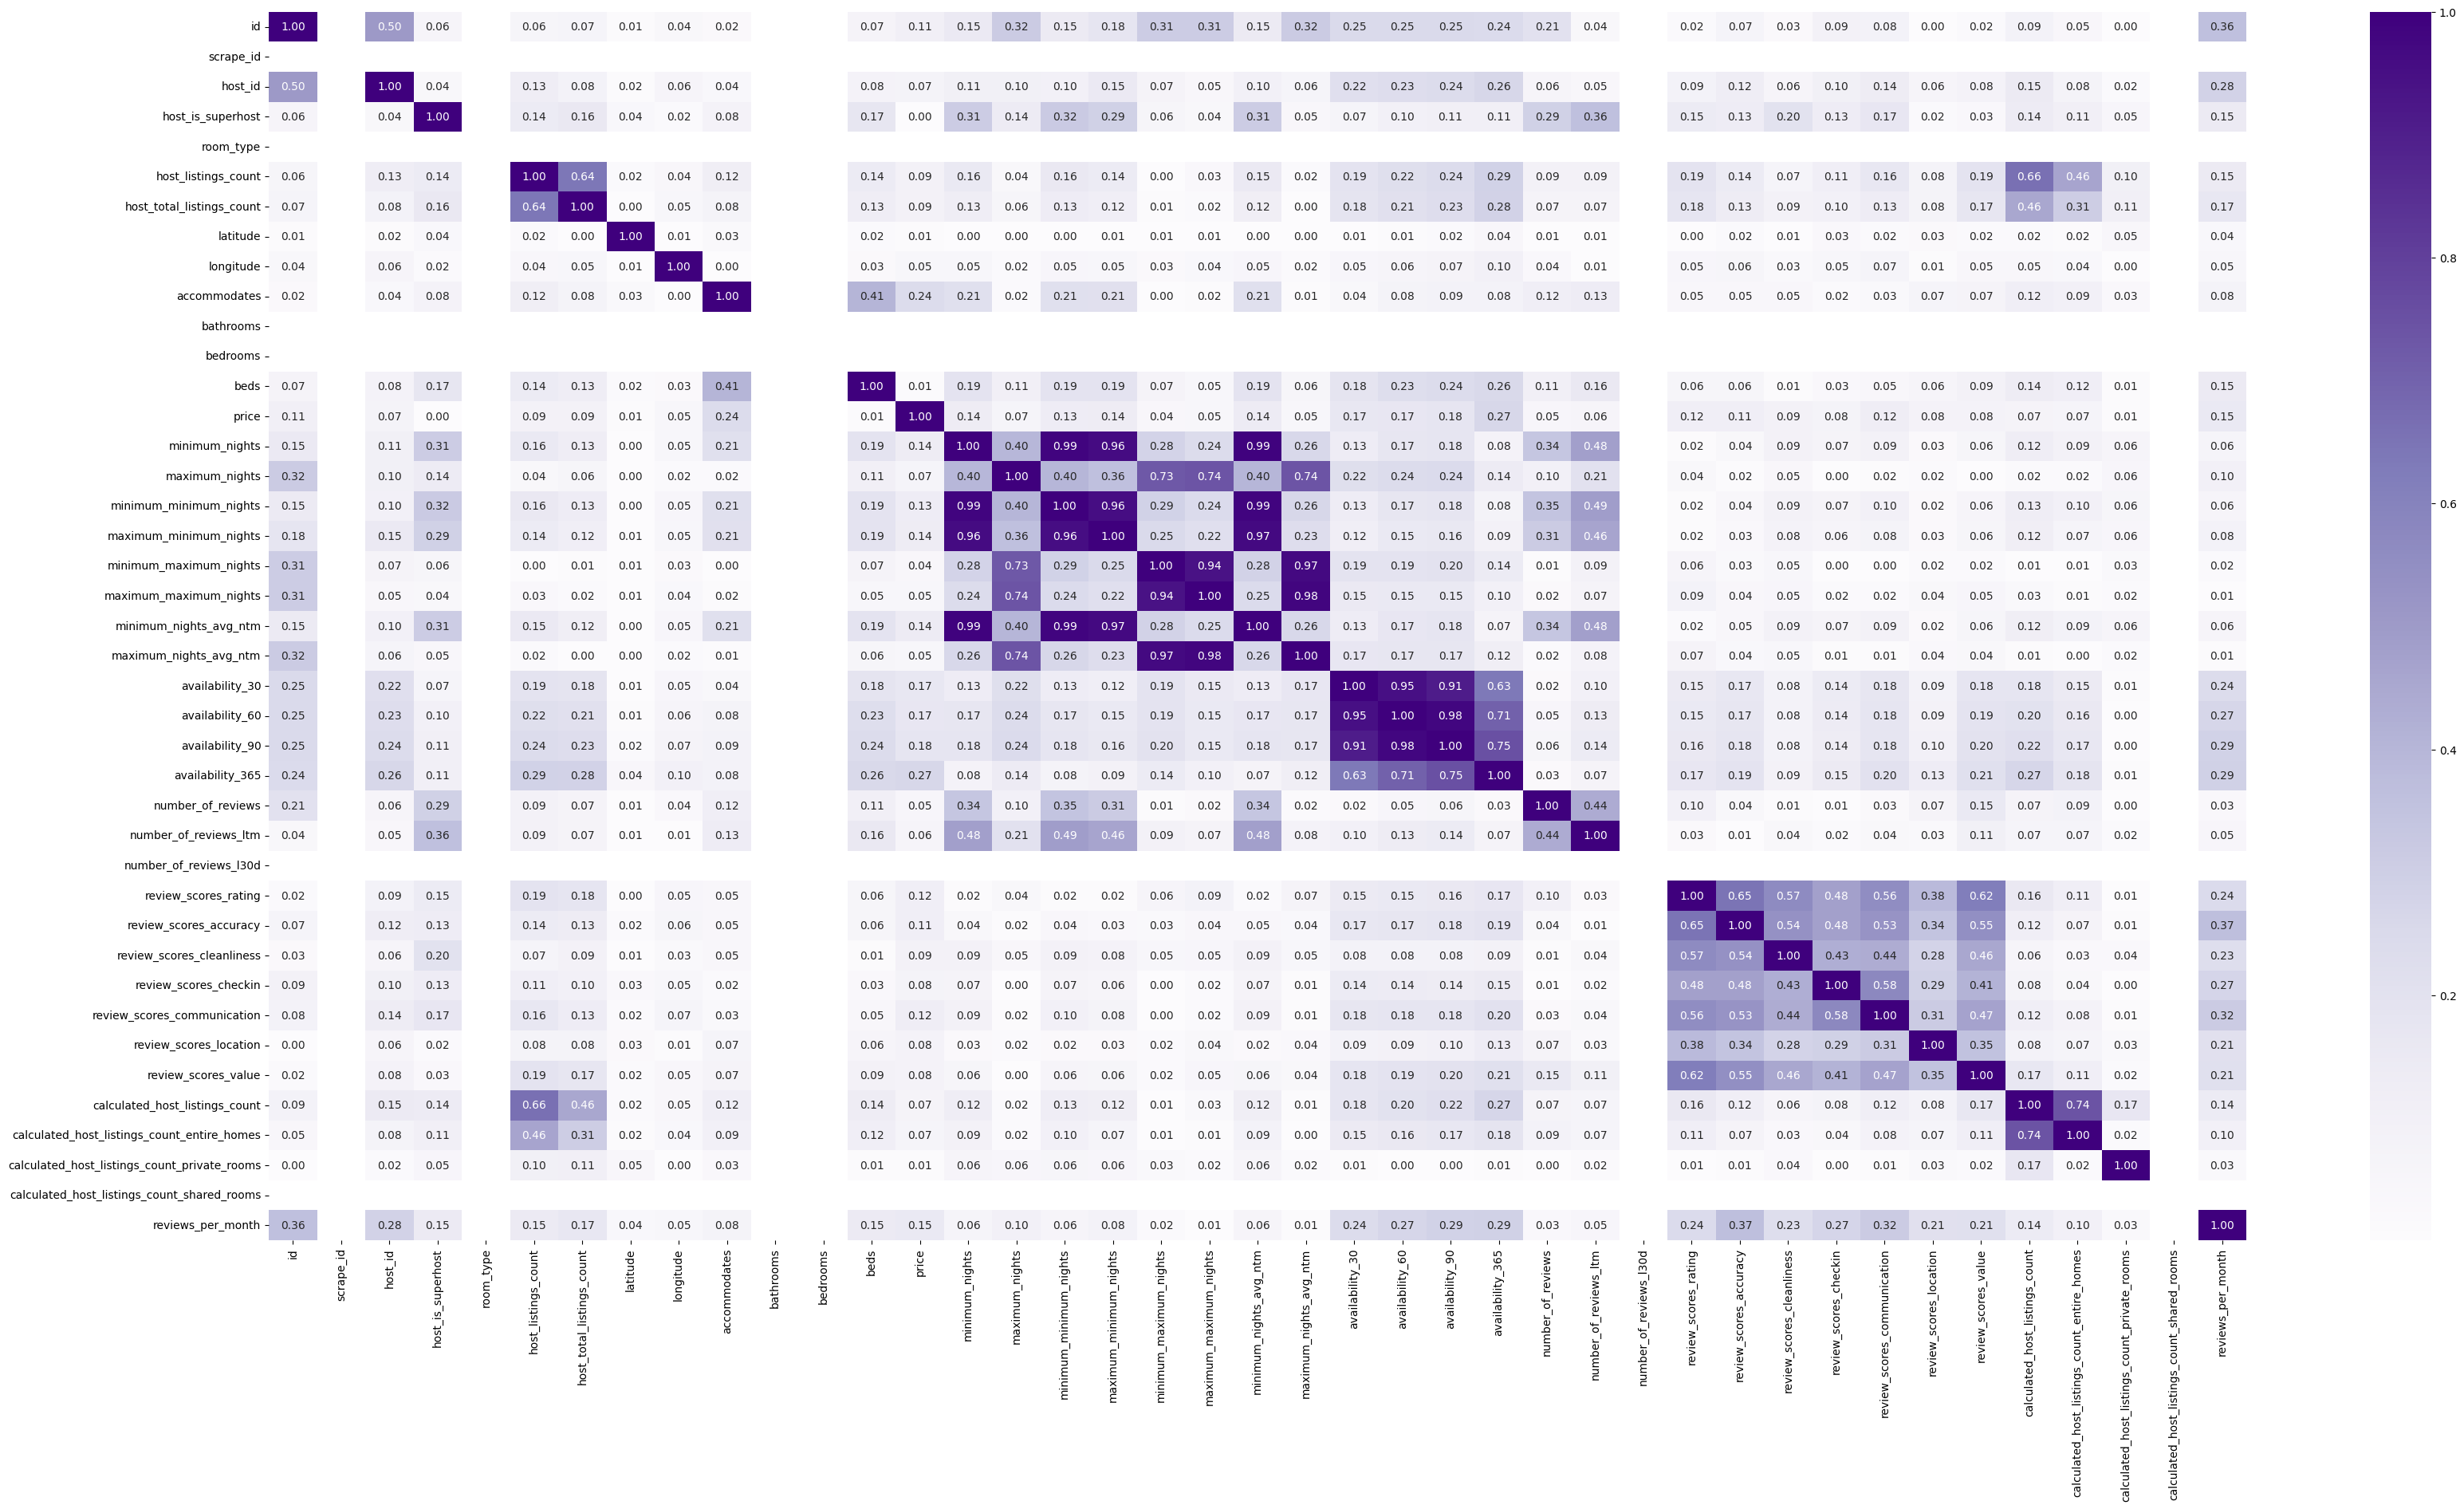

In [479]:
plt.figure(figsize=(40, 20))
Heat_Map_entire_home = sns.heatmap(Corr_Factors12, cmap="Purples", annot=True, fmt=".2f")

correlaciones de las siguientes variables (dependiente, independiente) ""Remplazar host_acceptance_rate""
1. "reviews_accuarcy vs "reviews_per_month”: 
Tiene un correlación de 0.37 lo cual es debíl
2. “review_scores_location vs review_scores_cleanliness”:
Tiene una correlación de 0.28 lo cual es debíl 
3. “Number of reviews vs price”:
Tiene una correlación de 0.05 lo cual es debíl casi nula
4. “availability_365 vs number_of_reviews”:
Tiene una correlación de 0.03 lo cual es muy debíl casi nula
5. “reviews score value vs number_of_reviews ”:
Tiene una correlación de 0.15 lo cual es debíl 
6. “reviews_per_month vs review_scores_communication”:
Tiene una correlación de 0.32 lo que es debíl

In [480]:
## Mejor modelo ## 
#Escogí esta variable porque tiene tres coeficientes muy altos.
Vars_Indep= entire_home_df[['minimum_nights_avg_ntm', 'minimum_minimum_nights','maximum_minimum_nights']]
Var_Dep= entire_home_df["minimum_nights"]

In [481]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [482]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de dterminacion es ",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlacion es ",coef_Correl)

El coeficiente de dterminacion es  0.9820678419845688
El coeficiente de correlacion es  0.9909933612212388


Este es el mejor modelo que se puede logar ya que esta muy cerca del 1 pero sin llegar, lo que significa que la variable dependiente se explica muy bien por las independientes. 

### Correlaciones más altas ## 
1. minimum_nights          minimum_nights_avg_ntm    0.99
2. minimum_nights_avg_ntm  minimum_nights            0.99
3. minimum_minimum_nights  minimum_nights_avg_ntm    0.99
4. minimum_nights_avg_ntm  minimum_minimum_nights    0.99
5. minimum_nights          minimum_minimum_nights    0.99
6. minimum_minimum_nights  minimum_nights            0.99
7. maximum_maximum_nights  maximum_nights_avg_ntm    0.98
8. maximum_nights_avg_ntm  maximum_maximum_nights    0.98
9. availability_60         availability_90           0.98
10. availability_90        availability_60          0.98

### Mejor modelo multiple para las variables host_id, host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month ###

## host_id ##

La correlacion mas alta es de id 0.50

Modelo de regresión multiple 

In [483]:
Vars_Indep= entire_home_df[['id', 'reviews_per_month','availability_365']]
Var_Dep= entire_home_df["host_id"]

In [484]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [485]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de dterminacion es ",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlacion es ",coef_Correl)

El coeficiente de dterminacion es  0.2545691883841512
El coeficiente de correlacion es  0.5045484995361211


Hallazgos: El modelo mejora de una correlación máxima de 0.504548 a un 5045489 es una mejora muy baja, por lo que se puede decir que para este modelo no es necesario hacer una regresión multiple.

## super host 

La correlacion mas alta es de number_of_reviews_ltm 0.360

In [486]:
Vars_Indep= entire_home_df[["number_of_reviews_ltm", "minimum_minimum_nights","minimum_nights"]]
Var_Dep= entire_home_df["host_is_superhost"]

In [487]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [488]:
coef_Deter_host_id=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter_host_id)
coef_Correl_host_id=np.sqrt(coef_Deter_host_id)
print("El coeficiente de correlación es",coef_Correl_host_id)

El coeficiente de determinacion es 0.15740510506616978
El coeficiente de correlación es 0.3967431222670026


Hallazgos: El coeficiente de correlación aumentó de 0.36  a 0.39 un incremento mayor a lo que se vio en otros modelos, pero la correlación no es muy alta solo de 39%. Lo que significa que un modelo de estos datos no sería muy acertado.

##  host_total_listings_count

La correlacion mas alta es de host_listings_count 0.6436

Modelo de regresion multiple

In [489]:
Vars_Indep= entire_home_df[["host_listings_count", "calculated_host_listings_count","calculated_host_listings_count_entire_homes"]]
Var_Dep= entire_home_df["host_total_listings_count"]

In [490]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [491]:
coef_Deter_host_id=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter_host_id)
coef_Correl_host_id=np.sqrt(coef_Deter_host_id)
print("El coeficiente de correlación es",coef_Correl_host_id)

El coeficiente de determinacion es 0.41643641989625824
El coeficiente de correlación es 0.6453188513411476


Hallazgos: El coeficiente de correlación del heatmap mejora de 0.6436 a 0.6453, una mejora muy poco siginificativa sin embargo, la correlación es interesnate. 

## accommodates

La correlacion mas alta es de beds 0.40

In [492]:
Vars_Indep= entire_home_df[["beds", "price","minimum_nights_avg_ntm"]]
Var_Dep= entire_home_df["accommodates"]

In [493]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [494]:
coef_Deter_host_id=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter_host_id)
coef_Correl_host_id=np.sqrt(coef_Deter_host_id)
print("El coeficiente de correlación es",coef_Correl_host_id)

El coeficiente de determinacion es 0.23080769791661404
El coeficiente de correlación es 0.4804244976233144


Hallazgos: El coeficiente de correlación aumentó de 0.40 a 0.48, aumentó un 8% lo cual es positivo, sin embargo, la correlación sigue siendo baja para crear un modelo predictivo acertado. 

## bedrooms ##
No existe correlaciones en esta columna por lo que no se puede hacer un modelo. 

## Price 

La correlación mas alta es de availabiliy de 0.26

In [495]:
Vars_Indep= entire_home_df[["availability_365", "accommodates","availability_90"]]
Var_Dep= entire_home_df["price"]

In [496]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [497]:
coef_Deter_host_id=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter_host_id)
coef_Correl_host_id=np.sqrt(coef_Deter_host_id)
print("El coeficiente de correlación es",coef_Correl_host_id)

El coeficiente de determinacion es 0.13854660472584046
El coeficiente de correlación es 0.3722184905748779


Hallazgos: EL modelo mejoró de 0.26 a 0.37 lo cual es una mejora bastante considerable, sin embargo, sigue siendo una correlación baja para hacer un modelo. 

## review_scores_value

La correlación más alta es de review_scores_rating 0.620419

In [498]:
Vars_Indep= entire_home_df[["review_scores_rating", "review_scores_accuracy","review_scores_communication"]]
Var_Dep= entire_home_df["review_scores_value"]

In [499]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [500]:
coef_Deter_host_id=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter_host_id)
coef_Correl_host_id=np.sqrt(coef_Deter_host_id)
print("El coeficiente de correlación es",coef_Correl_host_id)

El coeficiente de determinacion es 0.432047041583129
El coeficiente de correlación es 0.6573028537768028


La correlación mejoró de 0.62 a 0.65 lo cual fue una mejora útil y un 65 es un correlación significativa

## reviews_per_month

La correlación más alta es de review_scores_accuracy 0.366610

In [501]:
Vars_Indep= entire_home_df[["review_scores_accuracy", "id","review_scores_communication"]]
Var_Dep= entire_home_df["reviews_per_month"]

In [502]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [503]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.13208167537805515
El coeficiente de correlación es 0.36343042714948226


Hallazgos: Sorprendentemente al usar las 3 correlaciones mas altas el modelo no mejoró. 

## number_of_reviews remplazando host_acceptance_rate

La correlacion mas alta es number_of_reviews_ltm 0.44

In [504]:
Vars_Indep= entire_home_df[["number_of_reviews_ltm", "minimum_minimum_nights","minimum_nights_avg_ntm"]]
Var_Dep= entire_home_df["number_of_reviews"]

In [505]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [506]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.2160656917054078
El coeficiente de correlación es 0.4648286691947989


El modelo mejoró de 0.44 a 0.46 pero sigue siendo una correlación baja

# Room type 
No se puede hacer un modelo con esta variable porque no hay correlaciones

# Private room

In [507]:
private_df = cuantitativas[cuantitativas["room_type"] == 2]  
private_df.head()

id       scrape_id    host_id  host_is_superhost  \
1   1123383729460847373  20241221052002  206488801                0.0   
2   1205255838613758737  20241221052002   50009901                1.0   
11  1004454780293034887  20241221052002   66951992                1.0   
12             15245252  20241221052002   30928939                0.0   
16  1239840013506611065  20241221052002    5064065                0.0   

    room_type  host_listings_count  host_total_listings_count   latitude  \
1         2.0                  7.0                        7.0  52.560900   
2         2.0                  1.0                        1.0  52.504812   
11        2.0                  1.0                        1.0  52.529742   
12        2.0                  1.0                        1.0  52.524390   
16        2.0                  4.0                        5.0  52.572240   

    longitude  accommodates  ...  review_scores_cleanliness  \
1   13.350000           2.0  ...                       4.70   
2   13.415324           2.0  ...                       5.00   
11  13.424913           2.0  ...                       4.97   
12  13.479590           3.0  ...                       5.00   
16  13.395540           1.0  ...                       4.70   

    review_scores_checkin  review_scores_communication  \
1                    4.80                         4.80   
2                    4.97                         4.97   
11                   4.95                         5.00   
12                   5.00                         5.00   
16                   4.80                         4.80   

    review_scores_location  review_scores_value  \
1                     4.80                 4.70   
2                     4.94                 4.94   
11                    4.95                 4.79   
12                    5.00                 5.00   
16                    4.80                 4.70   

    calculated_host_listings_count  \
1                              3.0   
2                              1.0   
11                             1.0   
12                             1.0   
16                             1.0   

    calculated_host_listings_count_entire_homes  \
1                                           1.0   
2                                           0.0   
11                                          0.0   
12                                          0.0   
16                                          0.0   

    calculated_host_listings_count_private_rooms  \
1                                            2.0   
2                                            1.0   
11                                           1.0   
12                                           1.0   
16                                           1.0   

    calculated_host_listings_count_shared_rooms  reviews_per_month  
1                                           0.0               3.00  
2                                           0.0               1.60  
11                                          0.0               2.81  
12                                          0.0               0.01  
16                                          0.0               3.00  

[5 rows x 41 columns]

In [508]:
Corr_Factors =private_df.corr()
Corr_Factors.head()

id  scrape_id   host_id  host_is_superhost  \
id                 1.000000        NaN  0.504225           0.088755   
scrape_id               NaN        NaN       NaN                NaN   
host_id            0.504225        NaN  1.000000           0.008447   
host_is_superhost  0.088755        NaN  0.008447           1.000000   
room_type               NaN        NaN       NaN                NaN   

                   room_type  host_listings_count  host_total_listings_count  \
id                       NaN             0.163435                   0.147857   
scrape_id                NaN                  NaN                        NaN   
host_id                  NaN             0.312581                   0.220063   
host_is_superhost        NaN             0.026080                   0.023452   
room_type                NaN                  NaN                        NaN   

                   latitude  longitude  accommodates  ...  \
id                -0.032417  -0.023519      0.024379  ...   
scrape_id               NaN        NaN           NaN  ...   
host_id           -0.001597  -0.087392      0.045109  ...   
host_is_superhost  0.041788  -0.031887      0.004053  ...   
room_type               NaN        NaN           NaN  ...   

                   review_scores_cleanliness  review_scores_checkin  \
id                                  0.018140              -0.026847   
scrape_id                                NaN                    NaN   
host_id                            -0.043491              -0.102407   
host_is_superhost                   0.189997               0.160336   
room_type                                NaN                    NaN   

                   review_scores_communication  review_scores_location  \
id                                   -0.000911               -0.018876   
scrape_id                                  NaN                     NaN   
host_id                              -0.115752               -0.072606   
host_is_superhost                     0.174935                0.039193   
room_type                                  NaN                     NaN   

                   review_scores_value  calculated_host_listings_count  \
id                           -0.031350                        0.174136   
scrape_id                          NaN                             NaN   
host_id                      -0.102348                        0.299555   
host_is_superhost             0.123109                        0.108207   
room_type                          NaN                             NaN   

                   calculated_host_listings_count_entire_homes  \
id                                                    0.181241   
scrape_id                                                  NaN   
host_id                                               0.106773   
host_is_superhost                                    -0.007444   
room_type                                                  NaN   

                   calculated_host_listings_count_private_rooms  \
id                                                    -0.114355   
scrape_id                                                   NaN   
host_id                                               -0.256603   
host_is_superhost                                      0.119409   
room_type                                                   NaN   

                   calculated_host_listings_count_shared_rooms  \
id                                                         NaN   
scrape_id                                                  NaN   
host_id                                                    NaN   
host_is_superhost                                          NaN   
room_type                                                  NaN   

                   reviews_per_month  
id                          0.344192  
scrape_id                        NaN  
host_id                     0.206931  
host_is_superhost           0.206033  
room_type                        NaN  

[

In [509]:
Corr_Factors_private = abs(Corr_Factors)
Corr_Factors_private.head()

id  scrape_id   host_id  host_is_superhost  \
id                 1.000000        NaN  0.504225           0.088755   
scrape_id               NaN        NaN       NaN                NaN   
host_id            0.504225        NaN  1.000000           0.008447   
host_is_superhost  0.088755        NaN  0.008447           1.000000   
room_type               NaN        NaN       NaN                NaN   

                   room_type  host_listings_count  host_total_listings_count  \
id                       NaN             0.163435                   0.147857   
scrape_id                NaN                  NaN                        NaN   
host_id                  NaN             0.312581                   0.220063   
host_is_superhost        NaN             0.026080                   0.023452   
room_type                NaN                  NaN                        NaN   

                   latitude  longitude  accommodates  ...  \
id                 0.032417   0.023519      0.024379  ...   
scrape_id               NaN        NaN           NaN  ...   
host_id            0.001597   0.087392      0.045109  ...   
host_is_superhost  0.041788   0.031887      0.004053  ...   
room_type               NaN        NaN           NaN  ...   

                   review_scores_cleanliness  review_scores_checkin  \
id                                  0.018140               0.026847   
scrape_id                                NaN                    NaN   
host_id                             0.043491               0.102407   
host_is_superhost                   0.189997               0.160336   
room_type                                NaN                    NaN   

                   review_scores_communication  review_scores_location  \
id                                    0.000911                0.018876   
scrape_id                                  NaN                     NaN   
host_id                               0.115752                0.072606   
host_is_superhost                     0.174935                0.039193   
room_type                                  NaN                     NaN   

                   review_scores_value  calculated_host_listings_count  \
id                            0.031350                        0.174136   
scrape_id                          NaN                             NaN   
host_id                       0.102348                        0.299555   
host_is_superhost             0.123109                        0.108207   
room_type                          NaN                             NaN   

                   calculated_host_listings_count_entire_homes  \
id                                                    0.181241   
scrape_id                                                  NaN   
host_id                                               0.106773   
host_is_superhost                                     0.007444   
room_type                                                  NaN   

                   calculated_host_listings_count_private_rooms  \
id                                                     0.114355   
scrape_id                                                   NaN   
host_id                                                0.256603   
host_is_superhost                                      0.119409   
room_type                                                   NaN   

                   calculated_host_listings_count_shared_rooms  \
id                                                         NaN   
scrape_id                                                  NaN   
host_id                                                    NaN   
host_is_superhost                                          NaN   
room_type                                                  NaN   

                   reviews_per_month  
id                          0.344192  
scrape_id                        NaN  
host_id                     0.206931  
host_is_superhost           0.206033  
room_type                        NaN  

[

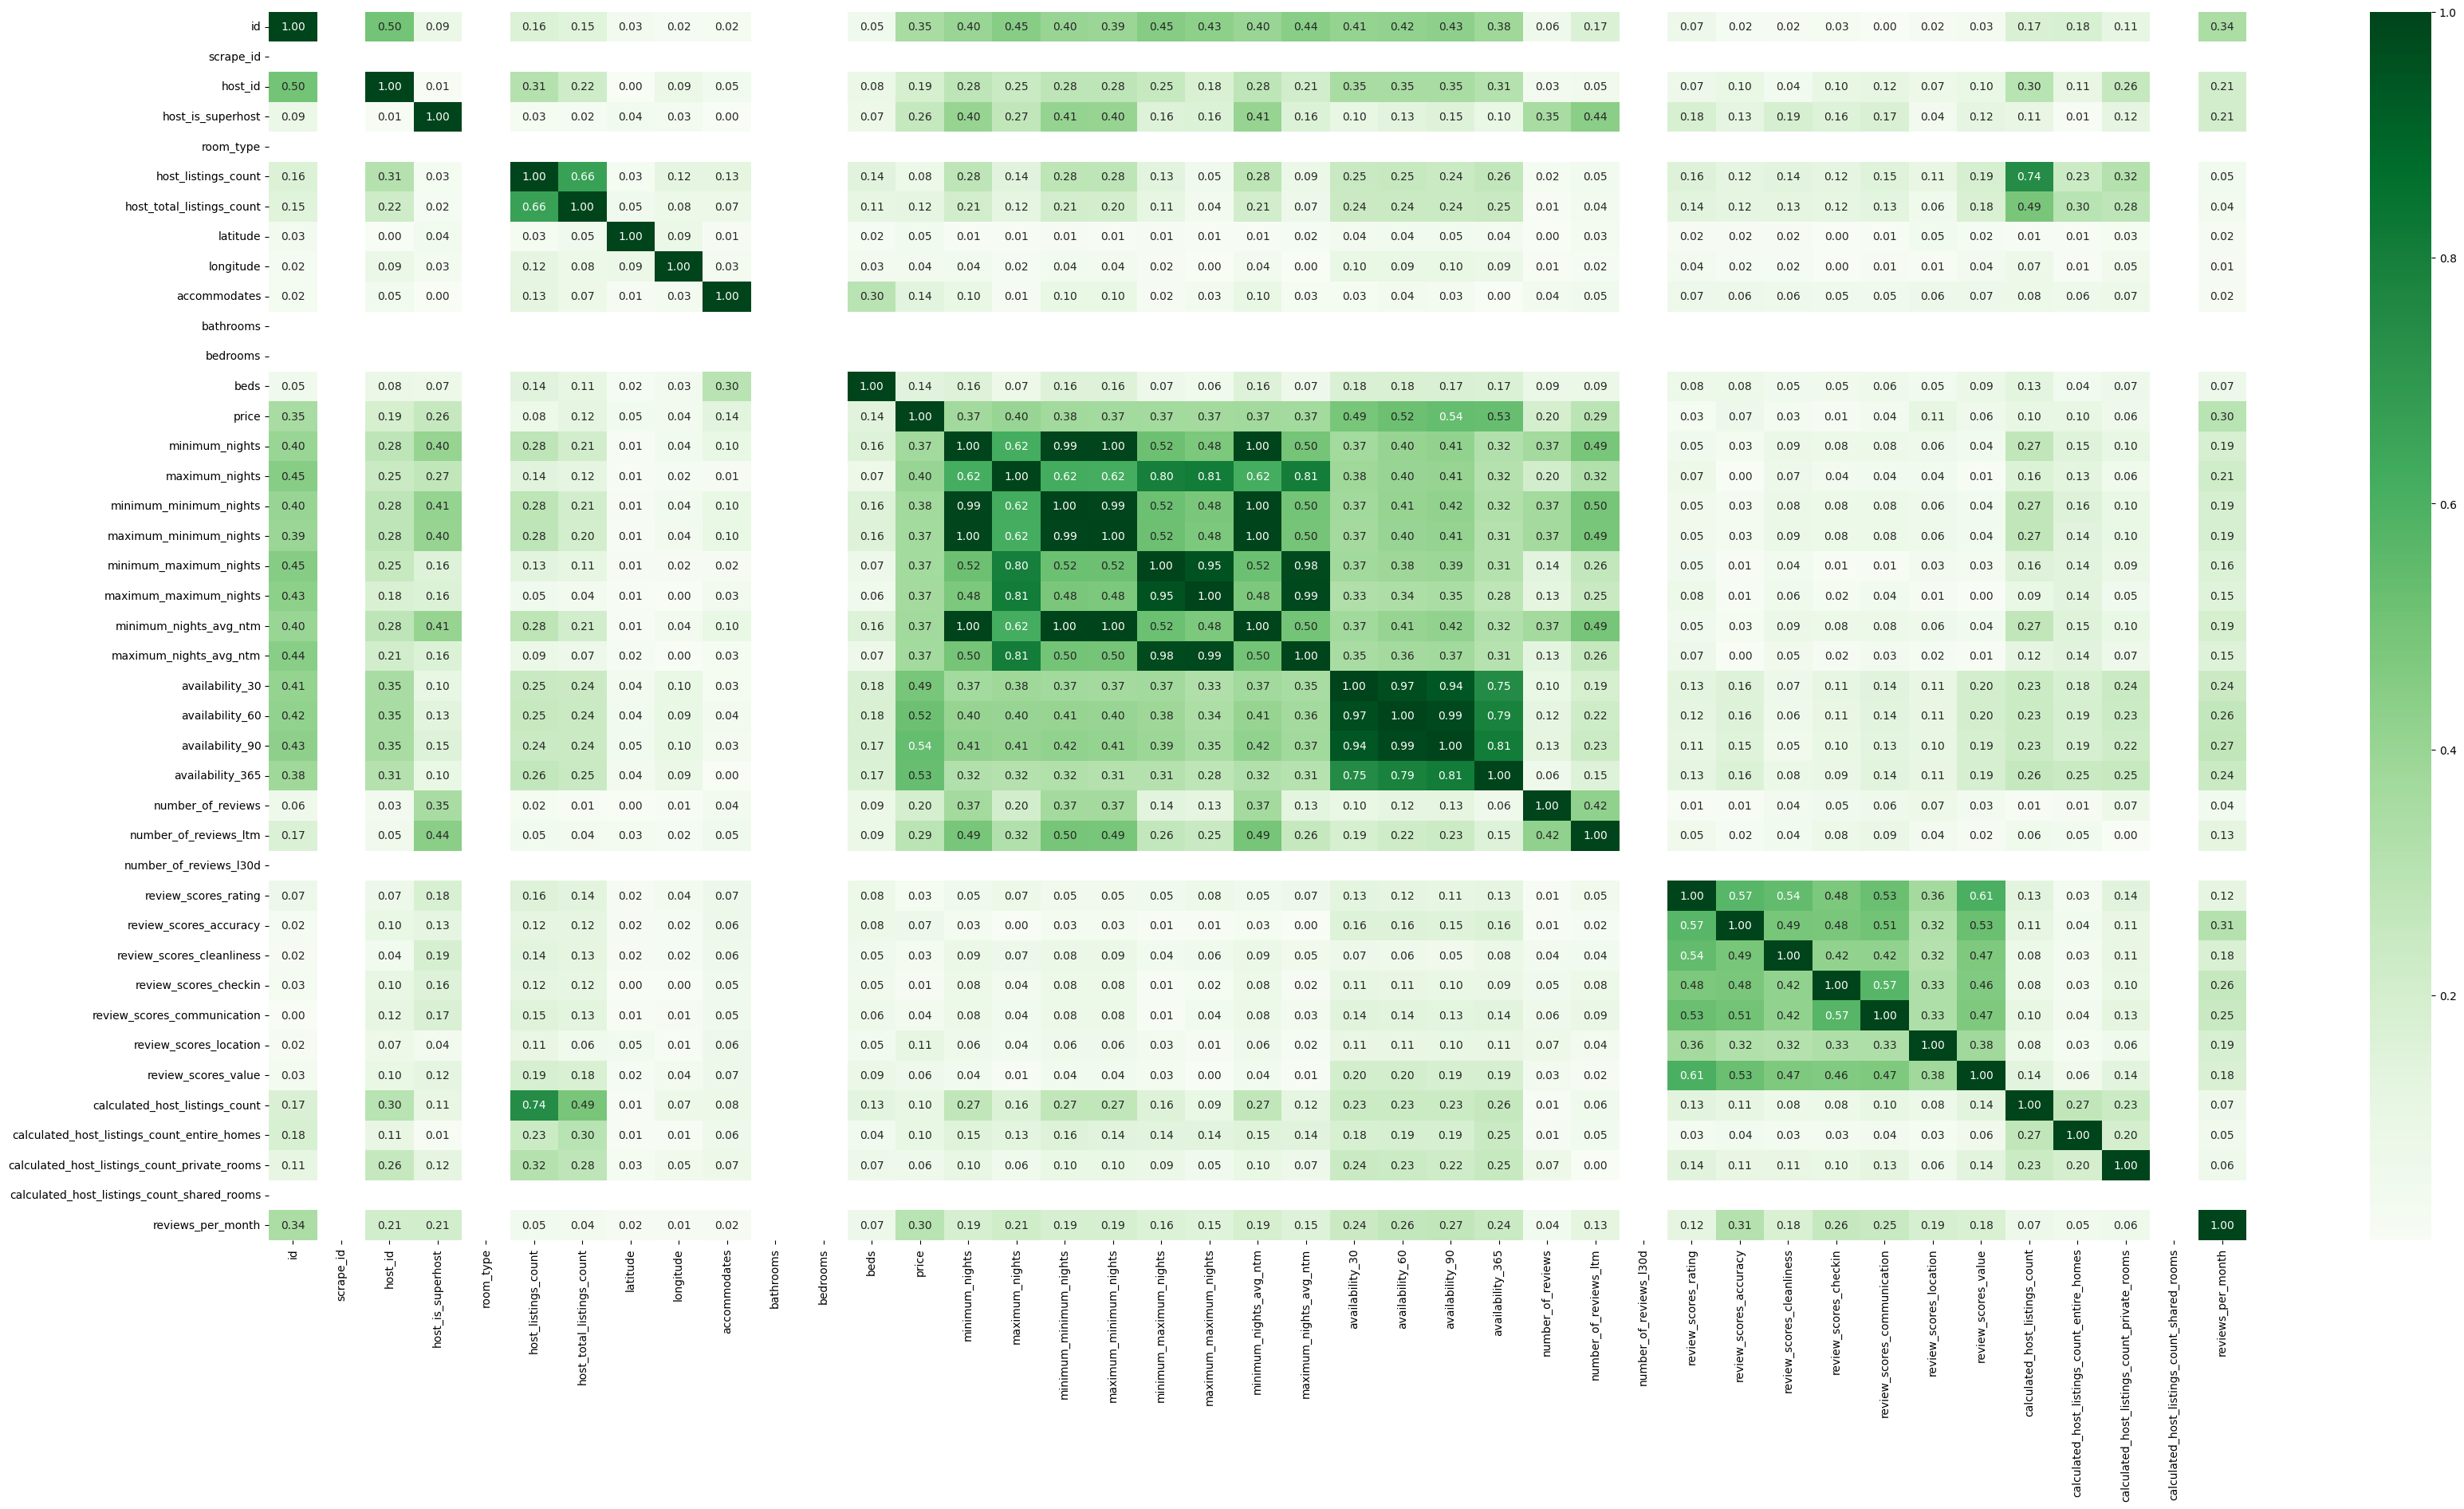

In [510]:
plt.figure(figsize=(40, 20))
Heat_Map_private = sns.heatmap(Corr_Factors_private, cmap="Greens", annot=True, fmt=".2f")

correlaciones de las siguientes variables (dependiente, independiente) ""Remplazar host_acceptance_rate""
1. "reviews_accuarcy vs "reviews_per_month”: 
Tiene un correlación de 0.31 lo cual es debíl
2. “review_scores_location vs review_scores_cleanliness”:
Tiene una correlación de 0.32 lo cual es debíl 
3. “Number of reviews vs price”:
Tiene una correlación de 0.20 lo cual es debíl
4. “availability_365 vs number_of_reviews”:
Tiene una correlación de 0.06 lo cual es muy debíl
5. “reviews score value vs number_of_reviews ”:
Tiene una correlación de 0.03 lo cual es muy debíl casi nula
6. “reviews_per_month vs review_scores_communication”:
Tiene una correlación de 0.25 lo que es debíl

In [511]:
## Mejor modelo ## 
#Escogí esta variable porque tiene tres coeficientes muy altos.
Vars_Indep= private_df[["availability_60", "availability_90","availability_365"]]
Var_Dep= private_df["availability_30"]


In [512]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [513]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.953000419021603
El coeficiente de correlación es 0.9762174035641872


El modelo tiene una correlación muy buena de 0.97 muy cercana al 1.

### Correlaciones más altas ## 
1. minimum_minimum_nights  maximum_minimum_nights            0.99
2. availability_60         availability_90                   0.99
3. maximum_maximum_nights  maximum_nights_avg_ntm            0.99
4. minimum_maximum_nights  maximum_nights_avg_ntm            0.98
5. availability_30         availability_60                   0.97
6. minimum_maximum_nights  maximum_maximum_nights            0.95
7. availability_30         availability_90                   0.94
8. availability_90         availability_365                  0.81
9. maximum_nights          maximum_maximum_nights            0.81
10. availability_60         availability_365                  0.78


### Mejor modelo multiple para las variables host_id, host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month ###

# Host_id
La correlacion mas alta es de 0.50 en id

In [514]:
Vars_Indep= private_df[["id", "availability_60","availability_90"]]
Var_Dep= private_df["host_id"]

In [515]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [516]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.2542424107256993
El coeficiente de correlación es 0.504224563786513


El modelo casi no mejora pasa de 0.50 a 0.5042 lo cual es una correlación moderada 

# super host 
La correlacion mas alta es number_of_reviews_ltm con 0.44

In [517]:
Vars_Indep= private_df[["number_of_reviews_ltm", "minimum_minimum_nights","minimum_nights_avg_ntm"]]
Var_Dep= private_df["host_is_superhost"]

In [518]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [519]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.24176465196646957
El coeficiente de correlación es 0.4916956904086811


De forma sorprendente el modelo empeora de 0.44 a 0.49 lo que es positivo y la correlacion es media

##  host_total_listings_count
La correlacion mas alta es host_listings_count con 0.66

In [520]:
Vars_Indep= private_df[["host_listings_count", "calculated_host_listings_count","calculated_host_listings_count_entire_homes"]]
Var_Dep= private_df["host_total_listings_count"]

In [521]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [522]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.4629743412905871
El coeficiente de correlación es 0.6804221787174395


El coeficiente mejoró de 0.66 a 0.68 lo cual es algo bueno y la correlación es moderada.

# accommodates 
La correlacion mas alta es de 0.30 beds

In [523]:
Vars_Indep= private_df[["beds", "price","host_listings_count"]]
Var_Dep= private_df["accommodates"]

In [524]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [525]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.13077979796917638
El coeficiente de correlación es 0.3616348959505656


La correlacion aumentó de 0.30 a 0.36, lo cual es bueno per la correlación sigue siendo baja. 

# Bedrooms 
En esta columna no existen correlaciones identificadas. 

# Price
La correlación mas alta es availability_90 0.54

In [526]:
Vars_Indep= private_df[["availability_90", "availability_365","availability_60"]]
Var_Dep= private_df["price"]

In [527]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [528]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.31518839679152366
El coeficiente de correlación es 0.5614164201299456


La correlación aumentó de 0.54 a 0.56, lo que significa que es moderada.

# review_scores_value
La correlcion mas alta es review_scores_rating 0.61

In [529]:
Vars_Indep= private_df[["review_scores_rating", "review_scores_accuracy","review_scores_cleanliness"]]
Var_Dep= private_df["review_scores_value"]

In [530]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [531]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.4291526013300667
El coeficiente de correlación es 0.655097398353914


La correlación aumentó de 0.61 a 0.65 lo cual es moderado. 

# reviews_per_month
La correlación más alta es de id 0.34

In [532]:
Vars_Indep= private_df[["id", "review_scores_accuracy","price"]]
Var_Dep= private_df["reviews_per_month"]

In [533]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [534]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.11846844085452368
El coeficiente de correlación es 0.34419244741063637


El modelo mejoró muy poco, parece que se queda en 0.34

## number_of_reviews remplazando host_acceptance_rate
La correlación más alta es de number_of_reviews_ltm 0.42

In [535]:
Vars_Indep= private_df[["number_of_reviews_ltm", "minimum_minimum_nights","minimum_nights_avg_ntm"]]
Var_Dep= private_df["number_of_reviews"]

In [536]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [537]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.21206567770138463
El coeficiente de correlación es 0.46050589323198093


El coeficiente mejoró de 0.42 a 0.46 lo que es una correlación moderada

# Room type 
No se puede hacer un modelo con esta variable porque no hay correlaciones

# Hotel room #

In [538]:
hotel_df = cuantitativas[cuantitativas["room_type"] == 3]  
hotel_df.head()

id       scrape_id    host_id  host_is_superhost  room_type  \
14   32116312  20241221052002  174136994                1.0        3.0   
17   28532851  20241221052002  215178674                1.0        3.0   
538  21018456  20241221052002  151358145                1.0        3.0   
558  30391846  20241221052002   65025515                1.0        3.0   
571  28532109  20241221052002  215178674                1.0        3.0   

     host_listings_count  host_total_listings_count  latitude  longitude  \
14                   7.0                        8.0  52.51756   13.46978   
17                   8.0                        8.0  52.49379   13.36134   
538                  2.0                        2.0  52.52983   13.44453   
558                  6.0                        6.0  52.54062   13.40986   
571                  8.0                        8.0  52.49379   13.36134   

     accommodates  ...  review_scores_cleanliness  review_scores_checkin  \
14            4.0  ...                       4.73                   4.87   
17            2.0  ...                       4.85                   4.86   
538           4.0  ...                       4.83                   4.91   
558           2.0  ...                       5.00                   5.00   
571           4.0  ...                       4.75                   4.75   

     review_scores_communication  review_scores_location  review_scores_value  \
14                          4.73                    4.73                 4.53   
17                          4.82                    4.63                 4.66   
538                         4.93                    4.73                 4.80   
558                         4.67                    5.00                 4.67   
571                         4.66                    4.60                 4.55   

     calculated_host_listings_count  \
14                              1.6   
17                              1.6   
538                             2.0   
558                             6.0   
571                             1.6   

     calculated_host_listings_count_entire_homes  \
14                                           1.0   
17                                           0.0   
538                                          0.0   
558                                          1.0   
571                                          0.0   

     calculated_host_listings_count_private_rooms  \
14                                            0.0   
17                                            1.0   
538                                           0.0   
558                                           0.0   
571                                           1.0   

     calculated_host_listings_count_shared_rooms  reviews_per_month  
14                                           0.0               1.66  
17                                           0.0               1.60  
538                                          0.0               6.66  
558                                          0.0               0.10  
571                                          0.0               1.26  

[5 rows x 41 columns]

In [539]:
Corr_Factors =hotel_df.corr()
Corr_Factors.head()

id  scrape_id   host_id  host_is_superhost  \
id                 1.000000        NaN  0.830800          -0.302371   
scrape_id               NaN        NaN       NaN                NaN   
host_id            0.830800        NaN  1.000000          -0.238033   
host_is_superhost -0.302371        NaN -0.238033           1.000000   
room_type               NaN        NaN       NaN                NaN   

                   room_type  host_listings_count  host_total_listings_count  \
id                       NaN            -0.371659                  -0.269613   
scrape_id                NaN                  NaN                        NaN   
host_id                  NaN            -0.222115                  -0.118703   
host_is_superhost        NaN             0.413067                   0.493192   
room_type                NaN                  NaN                        NaN   

                   latitude  longitude  accommodates  ...  \
id                 0.129242   0.178677      0.327437  ...   
scrape_id               NaN        NaN           NaN  ...   
host_id           -0.038779   0.055535      0.259106  ...   
host_is_superhost -0.268703  -0.314356     -0.101982  ...   
room_type               NaN        NaN           NaN  ...   

                   review_scores_cleanliness  review_scores_checkin  \
id                                 -0.215265              -0.060802   
scrape_id                                NaN                    NaN   
host_id                            -0.291593              -0.054065   
host_is_superhost                   0.218722               0.115096   
room_type                                NaN                    NaN   

                   review_scores_communication  review_scores_location  \
id                                   -0.001602                0.014899   
scrape_id                                  NaN                     NaN   
host_id                              -0.057438               -0.092420   
host_is_superhost                     0.138196               -0.122743   
room_type                                  NaN                     NaN   

                   review_scores_value  calculated_host_listings_count  \
id                            0.211839                       -0.354920   
scrape_id                          NaN                             NaN   
host_id                       0.148045                       -0.282792   
host_is_superhost             0.084549                        0.231815   
room_type                          NaN                             NaN   

                   calculated_host_listings_count_entire_homes  \
id                                                   -0.181426   
scrape_id                                                  NaN   
host_id                                              -0.233703   
host_is_superhost                                     0.182730   
room_type                                                  NaN   

                   calculated_host_listings_count_private_rooms  \
id                                                    -0.180529   
scrape_id                                                   NaN   
host_id                                               -0.180163   
host_is_superhost                                     -0.179477   
room_type                                                   NaN   

                   calculated_host_listings_count_shared_rooms  \
id                                                         NaN   
scrape_id                                                  NaN   
host_id                                                    NaN   
host_is_superhost                                          NaN   
room_type                                                  NaN   

                   reviews_per_month  
id                          0.284488  
scrape_id                        NaN  
host_id                     0.328805  
host_is_superhost           0.161695  
room_type                        NaN  

[

In [540]:
Corr_Factors_hotel = abs(Corr_Factors)
Corr_Factors_hotel.head()

id  scrape_id   host_id  host_is_superhost  \
id                 1.000000        NaN  0.830800           0.302371   
scrape_id               NaN        NaN       NaN                NaN   
host_id            0.830800        NaN  1.000000           0.238033   
host_is_superhost  0.302371        NaN  0.238033           1.000000   
room_type               NaN        NaN       NaN                NaN   

                   room_type  host_listings_count  host_total_listings_count  \
id                       NaN             0.371659                   0.269613   
scrape_id                NaN                  NaN                        NaN   
host_id                  NaN             0.222115                   0.118703   
host_is_superhost        NaN             0.413067                   0.493192   
room_type                NaN                  NaN                        NaN   

                   latitude  longitude  accommodates  ...  \
id                 0.129242   0.178677      0.327437  ...   
scrape_id               NaN        NaN           NaN  ...   
host_id            0.038779   0.055535      0.259106  ...   
host_is_superhost  0.268703   0.314356      0.101982  ...   
room_type               NaN        NaN           NaN  ...   

                   review_scores_cleanliness  review_scores_checkin  \
id                                  0.215265               0.060802   
scrape_id                                NaN                    NaN   
host_id                             0.291593               0.054065   
host_is_superhost                   0.218722               0.115096   
room_type                                NaN                    NaN   

                   review_scores_communication  review_scores_location  \
id                                    0.001602                0.014899   
scrape_id                                  NaN                     NaN   
host_id                               0.057438                0.092420   
host_is_superhost                     0.138196                0.122743   
room_type                                  NaN                     NaN   

                   review_scores_value  calculated_host_listings_count  \
id                            0.211839                        0.354920   
scrape_id                          NaN                             NaN   
host_id                       0.148045                        0.282792   
host_is_superhost             0.084549                        0.231815   
room_type                          NaN                             NaN   

                   calculated_host_listings_count_entire_homes  \
id                                                    0.181426   
scrape_id                                                  NaN   
host_id                                               0.233703   
host_is_superhost                                     0.182730   
room_type                                                  NaN   

                   calculated_host_listings_count_private_rooms  \
id                                                     0.180529   
scrape_id                                                   NaN   
host_id                                                0.180163   
host_is_superhost                                      0.179477   
room_type                                                   NaN   

                   calculated_host_listings_count_shared_rooms  \
id                                                         NaN   
scrape_id                                                  NaN   
host_id                                                    NaN   
host_is_superhost                                          NaN   
room_type                                                  NaN   

                   reviews_per_month  
id                          0.284488  
scrape_id                        NaN  
host_id                     0.328805  
host_is_superhost           0.161695  
room_type                        NaN  

[

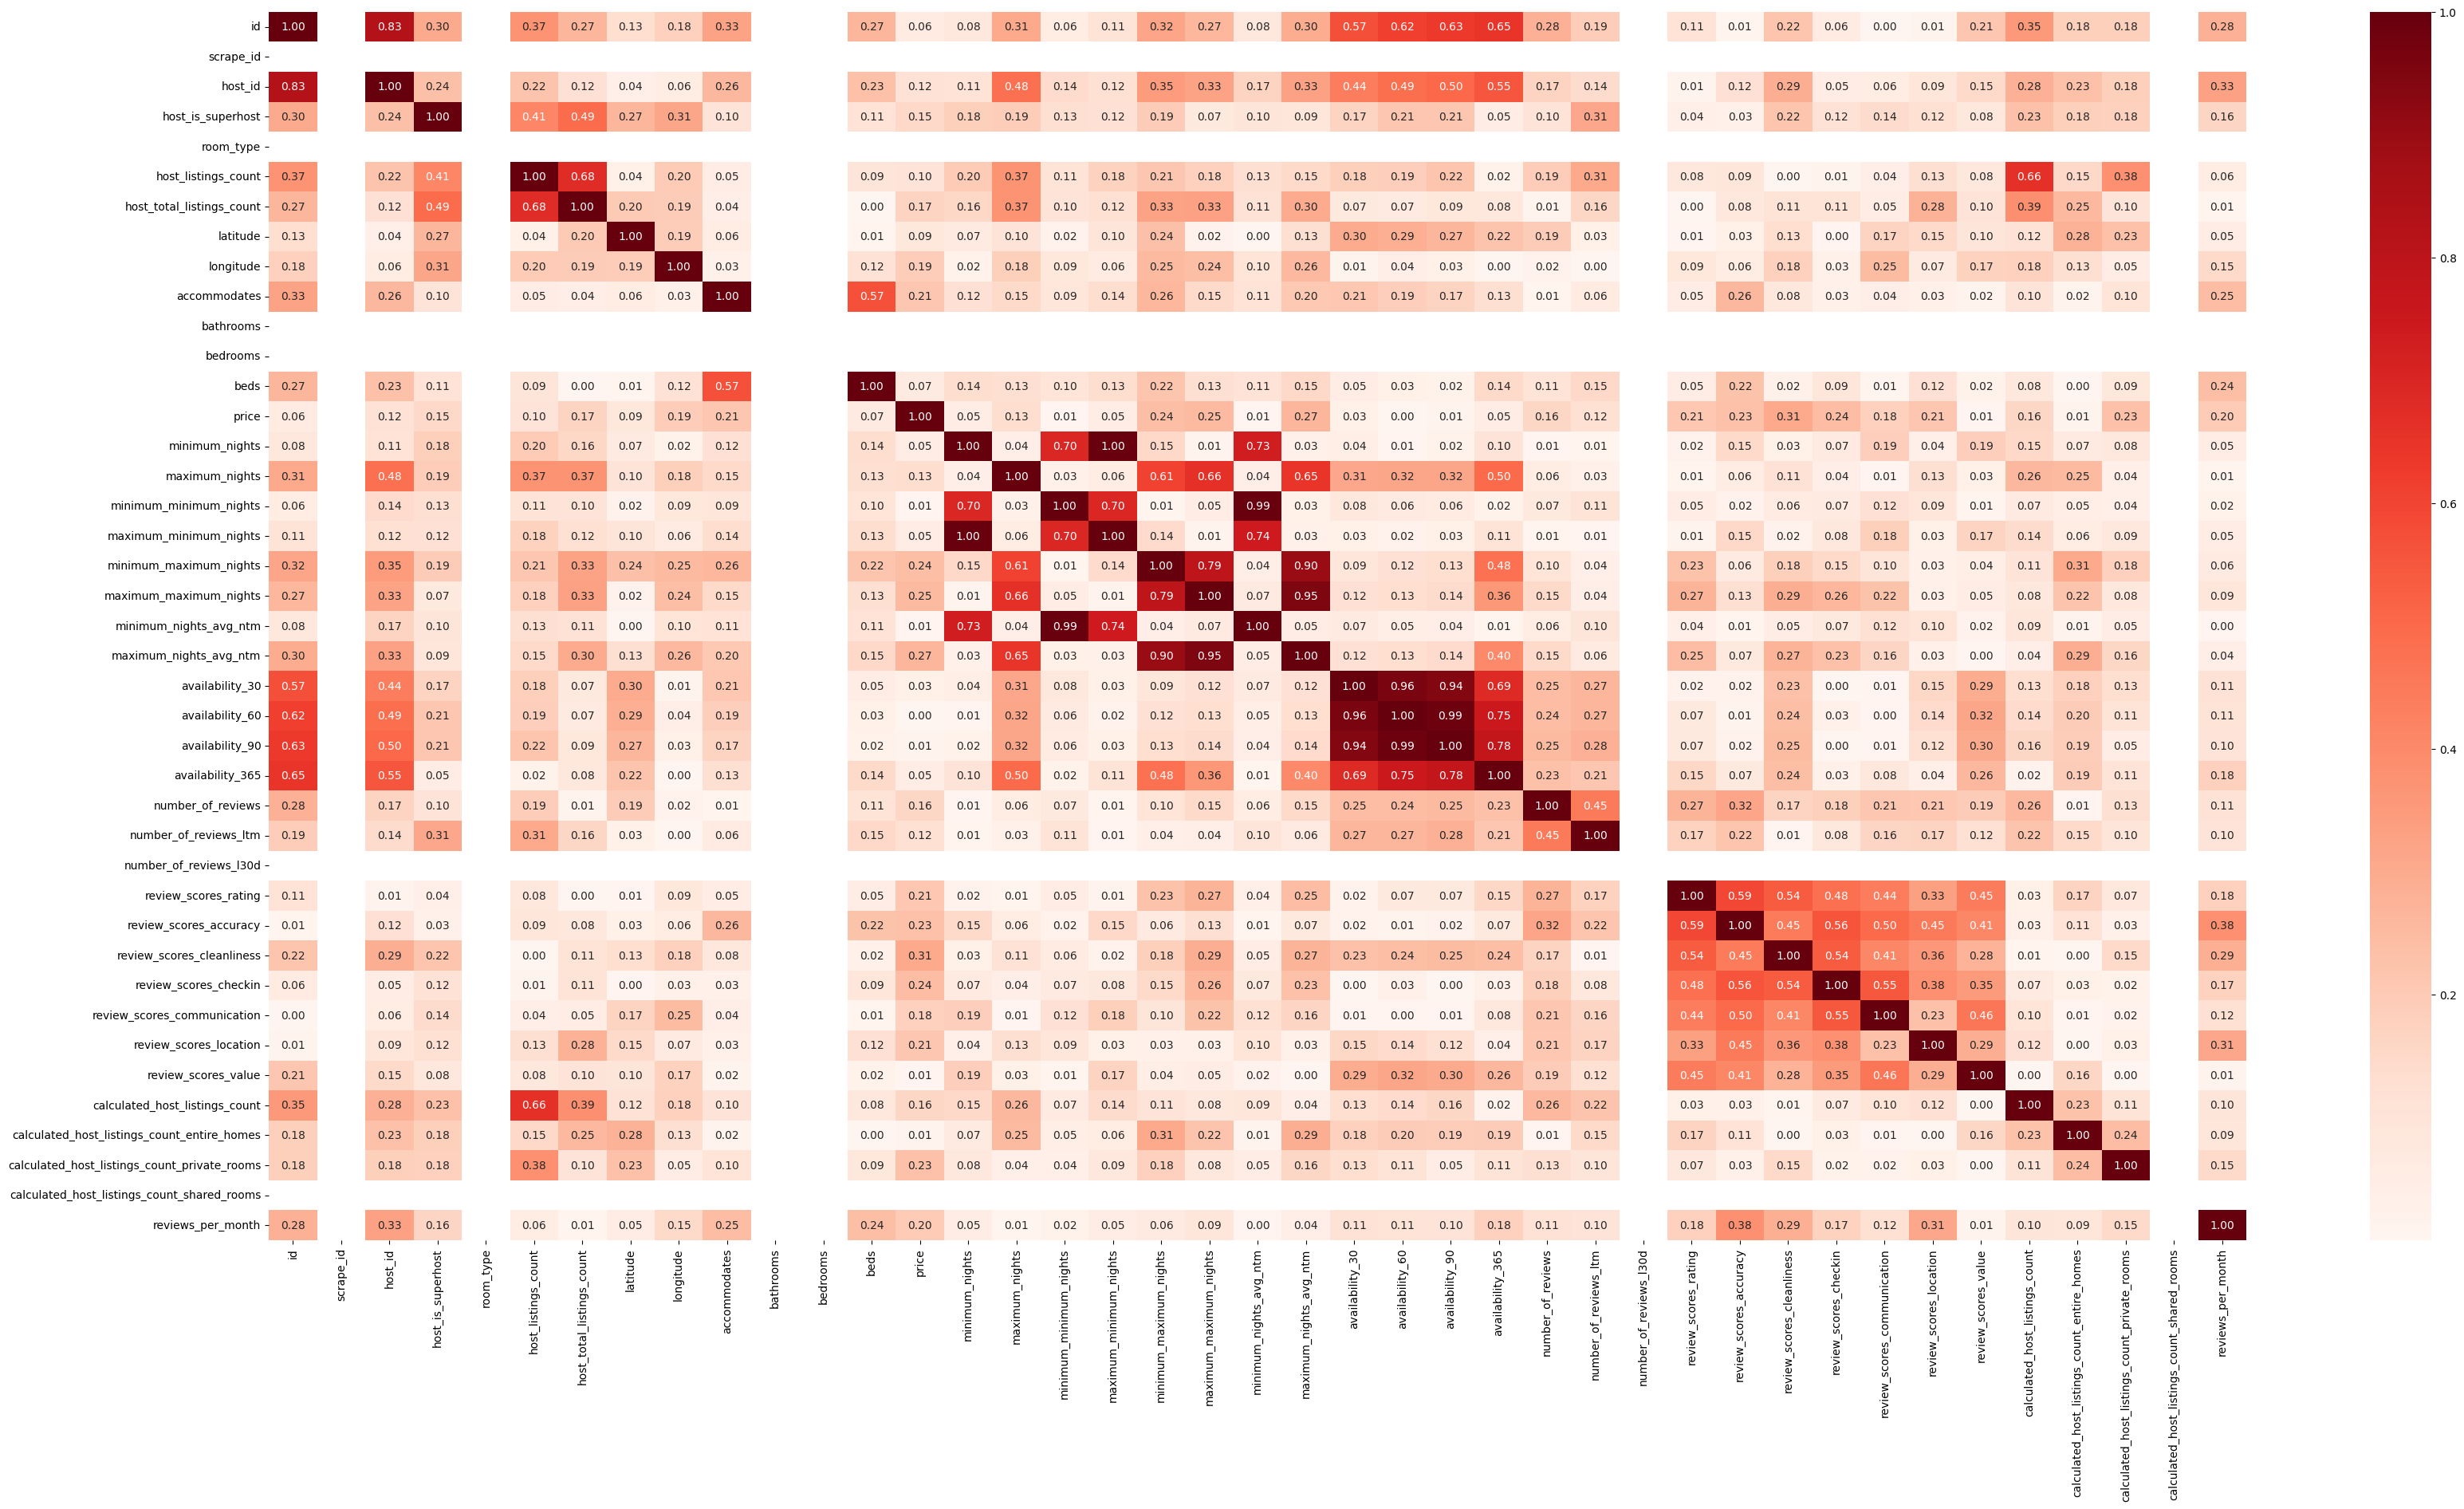

In [541]:
plt.figure(figsize=(40, 20))
Heat_Map_hotel = sns.heatmap(Corr_Factors_hotel, cmap="Reds", annot=True, fmt=".2f")

correlaciones de las siguientes variables (dependiente, independiente) ""Remplazar host_acceptance_rate""
1. "reviews_accuarcy vs "reviews_per_month”: 
Tiene un correlación de 0.38 lo cual es debíl
2. “review_scores_location vs review_scores_cleanliness”:
Tiene una correlación de 0.36 lo cual es debíl 
3. “Number of reviews vs price”:
Tiene una correlación de 0.16 lo cual es debíl
4. “availability_365 vs number_of_reviews”:
Tiene una correlación de 0.23 lo cual es muy debíl
5. “reviews score value vs number_of_reviews ”:
Tiene una correlación de 0.19 lo cual es debíl
6. “reviews_per_month vs review_scores_communication”:
Tiene una correlación de 0.12 lo que es debíl

In [542]:
## Mejor modelo ## 
#Escogí esta variable porque tiene tres coeficientes muy altos.
Vars_Indep= hotel_df[["availability_90", "availability_30","availability_365"]]
Var_Dep= hotel_df["availability_60"]

In [543]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [544]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.9815520877459863
El coeficiente de correlación es 0.9907331062127612


El modelo es muy bueno ya que es una correlación muy cercana al uno de 0.99

correlaciones mas altas
1. availability_60         availability_90           0.99
2. availability_90         availability_60           0.99
3. availability_30         availability_60           0.96
4. availability_60         availability_30           0.96
5. maximum_maximum_nights  maximum_nights_avg_ntm    0.95
6. maximum_nights_avg_ntm  maximum_maximum_nights    0.95
7. availability_30         availability_90           0.94
8. availability_90         availability_30           0.94
9. minimum_maximum_nights  maximum_nights_avg_ntm    0.90
10. maximum_nights_avg_ntm  minimum_maximum_nights   0.90

### Mejor modelo multiple para las variables host_id, host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month ###

# host_id
La correlación más alta es de id 0.83

In [545]:
Vars_Indep= hotel_df[["id", "availability_365","availability_90"]]
Var_Dep= hotel_df["host_id"]

In [546]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [547]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.6902287336924129
El coeficiente de correlación es 0.8308000563868619


No se nota mucho al difrencia entre los modelos el multiple se mantiene en 0.83

# Super host
La correlación más alta es de host_total_listings_count 0.49

In [548]:
Vars_Indep= hotel_df[["host_total_listings_count", "host_listings_count","longitude"]]
Var_Dep= hotel_df["host_is_superhost"]

In [549]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [550]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.3004346555320955
El coeficiente de correlación es 0.5481191982881967


La correlación mejora bastante de 0.49 a 0.54, aunque sigue siendo una correlación moderada 

# host_total_listings_count
La correlación más alta es de host_listings_count 0.68

In [551]:
Vars_Indep= hotel_df[["host_listings_count", "host_is_superhost","calculated_host_listings_count"]]
Var_Dep= hotel_df["host_total_listings_count"]

In [552]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [553]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.520658177762032
El coeficiente de correlación es 0.7215664749432529


El coeficente es mejora de 0.68 a 0.72 lo cual es un coeficiente bueno y una mejora consiedrable 

# accommodates
La correlación más alta es beds 0.57

In [554]:
Vars_Indep= hotel_df[["beds", "id","minimum_maximum_nights"]]
Var_Dep= hotel_df["accommodates"]

In [555]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [556]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.10721512936139965
El coeficiente de correlación es 0.32743721438071094


El coeficiente de correlación bajo lo que significa que la columna se explica más por beds que por las otras dos variables.

# Bedrooms 
En esta columna no existen correlaciones identificadas. 

# Price
La correlación más alta es 0.31

In [557]:
Vars_Indep= hotel_df[["review_scores_cleanliness", "maximum_nights_avg_ntm","maximum_maximum_nights"]]
Var_Dep= hotel_df["price"]

In [558]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [559]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.13134796287817152
El coeficiente de correlación es 0.3624195950527117


El coeficiente mejoró de 0.31 a 0.36, lo cual sigue siendo una correlación baja 

# review_scores_value
La correlacion más alta es review_scores_communication 0.46

In [560]:
Vars_Indep= hotel_df[["review_scores_communication", "review_scores_rating","review_scores_accuracy"]]
Var_Dep= hotel_df["review_scores_value"]

In [561]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [562]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.29413462104691535
El coeficiente de correlación es 0.5423417935646444


El coeficente mejoró de 0.46 a 0.54 lo cual es una correlación moderada

# reviews_per_month
La correlación más alta es review_scores_accuracy 0.38

In [563]:
Vars_Indep= hotel_df[["review_scores_accuracy", "host_id","review_scores_location"]]
Var_Dep= hotel_df["reviews_per_month"]

In [564]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [565]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.24673806666079923
El coeficiente de correlación es 0.49672735646509264


El coeficiente mejoró mucho de 0.38 a 0.49 y es una correlación moderada.

# number_of_reviews remplazando host_acceptance_rate
La correlacion mas alta es number_of_reviews_ltm 0.45

In [566]:
Vars_Indep= hotel_df[["number_of_reviews_ltm", "review_scores_accuracy","id"]]
Var_Dep= hotel_df["number_of_reviews"]

In [567]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [568]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.08039687461072464
El coeficiente de correlación es 0.2835434263225382


La correlación bajó lo que significa que no hay tanta relación con las otras variables.

# Room type 
No se puede generar un modelo con esta columna porque no existe correlación según el heat map

# Shared room

In [569]:
shared_df = cuantitativas[cuantitativas["room_type"] == 4]  
shared_df.head()

id       scrape_id    host_id  host_is_superhost  \
81               30059792  20241221052002   22257295                0.0   
530   1285481193728561463  20241221052002  339135580                1.0   
647               3679527  20241221052002   18700789                0.0   
1399  1285001432031103268  20241221052002  339135580                1.0   
1418             22559227  20241221052002    8250486                0.0   

      room_type  host_listings_count  host_total_listings_count   latitude  \
81          4.0                  3.0                        4.0  52.519770   
530         4.0                  1.9                       13.0  52.498095   
647         4.0                  1.0                        1.0  52.549950   
1399        4.0                  1.9                       13.0  52.498852   
1418        4.0                  1.9                        2.8  52.515750   

      longitude  accommodates  ...  review_scores_cleanliness  \
81    13.385940           2.0  ...                       5.00   
530   13.446826           2.8  ...                       4.70   
647   13.350130           2.0  ...                       4.49   
1399  13.445851           2.0  ...                       4.70   
1418  13.424960           6.0  ...                       4.56   

      review_scores_checkin  review_scores_communication  \
81                     5.00                         5.00   
530                    4.80                         4.80   
647                    4.71                         4.79   
1399                   4.80                         4.80   
1418                   4.77                         4.65   

      review_scores_location  review_scores_value  \
81                      5.00                 5.00   
530                     4.80                 4.70   
647                     4.50                 4.79   
1399                    4.80                 4.70   
1418                    4.49                 4.47   

      calculated_host_listings_count  \
81                               1.0   
530                              1.6   
647                              1.0   
1399                             1.6   
1418                             1.6   

      calculated_host_listings_count_entire_homes  \
81                                            0.0   
530                                           0.0   
647                                           0.0   
1399                                          0.0   
1418                                          0.0   

      calculated_host_listings_count_private_rooms  \
81                                             0.0   
530                                            0.3   
647                                            0.0   
1399                                           0.3   
1418                                           0.3   

      calculated_host_listings_count_shared_rooms  reviews_per_month  
81                                            0.0               0.10  
530                                           0.0               3.00  
647                                           0.0               0.32  
1399                                          0.0               3.00  
1418                                          0.0               0.53  

[5 rows x 41 columns]

In [570]:
Corr_Factors =shared_df.corr()
Corr_Factors.head()

id  scrape_id   host_id  host_is_superhost  \
id                 1.000000        NaN  0.767054           0.762114   
scrape_id               NaN        NaN       NaN                NaN   
host_id            0.767054        NaN  1.000000           0.695045   
host_is_superhost  0.762114        NaN  0.695045           1.000000   
room_type               NaN        NaN       NaN                NaN   

                   room_type  host_listings_count  host_total_listings_count  \
id                       NaN            -0.129603                   0.780076   
scrape_id                NaN                  NaN                        NaN   
host_id                  NaN             0.163367                   0.674049   
host_is_superhost        NaN            -0.064203                   0.839283   
room_type                NaN                  NaN                        NaN   

                   latitude  longitude  accommodates  ...  \
id                -0.556281   0.162777     -0.247263  ...   
scrape_id               NaN        NaN           NaN  ...   
host_id           -0.315593  -0.218722     -0.353305  ...   
host_is_superhost -0.348224   0.235409     -0.300446  ...   
room_type               NaN        NaN           NaN  ...   

                   review_scores_cleanliness  review_scores_checkin  \
id                                  0.090594               0.175493   
scrape_id                                NaN                    NaN   
host_id                             0.250157               0.373728   
host_is_superhost                   0.183148               0.048287   
room_type                                NaN                    NaN   

                   review_scores_communication  review_scores_location  \
id                                    0.385336                0.409176   
scrape_id                                  NaN                     NaN   
host_id                               0.449678                0.508110   
host_is_superhost                     0.251446                0.449982   
room_type                                  NaN                     NaN   

                   review_scores_value  calculated_host_listings_count  \
id                            0.196862                       -0.011236   
scrape_id                          NaN                             NaN   
host_id                       0.431239                        0.280627   
host_is_superhost             0.276446                        0.077907   
room_type                          NaN                             NaN   

                   calculated_host_listings_count_entire_homes  \
id                                                         NaN   
scrape_id                                                  NaN   
host_id                                                    NaN   
host_is_superhost                                          NaN   
room_type                                                  NaN   

                   calculated_host_listings_count_private_rooms  \
id                                                    -0.073071   
scrape_id                                                   NaN   
host_id                                                0.147789   
host_is_superhost                                      0.184927   
room_type                                                   NaN   

                   calculated_host_listings_count_shared_rooms  \
id                                                         NaN   
scrape_id                                                  NaN   
host_id                                                    NaN   
host_is_superhost                                          NaN   
room_type                                                  NaN   

                   reviews_per_month  
id                          0.361449  
scrape_id                        NaN  
host_id                     0.458647  
host_is_superhost           0.651486  
room_type                        NaN  

[

In [571]:
Corr_Factors_shared = abs(Corr_Factors)
Corr_Factors_shared.head()

id  scrape_id   host_id  host_is_superhost  \
id                 1.000000        NaN  0.767054           0.762114   
scrape_id               NaN        NaN       NaN                NaN   
host_id            0.767054        NaN  1.000000           0.695045   
host_is_superhost  0.762114        NaN  0.695045           1.000000   
room_type               NaN        NaN       NaN                NaN   

                   room_type  host_listings_count  host_total_listings_count  \
id                       NaN             0.129603                   0.780076   
scrape_id                NaN                  NaN                        NaN   
host_id                  NaN             0.163367                   0.674049   
host_is_superhost        NaN             0.064203                   0.839283   
room_type                NaN                  NaN                        NaN   

                   latitude  longitude  accommodates  ...  \
id                 0.556281   0.162777      0.247263  ...   
scrape_id               NaN        NaN           NaN  ...   
host_id            0.315593   0.218722      0.353305  ...   
host_is_superhost  0.348224   0.235409      0.300446  ...   
room_type               NaN        NaN           NaN  ...   

                   review_scores_cleanliness  review_scores_checkin  \
id                                  0.090594               0.175493   
scrape_id                                NaN                    NaN   
host_id                             0.250157               0.373728   
host_is_superhost                   0.183148               0.048287   
room_type                                NaN                    NaN   

                   review_scores_communication  review_scores_location  \
id                                    0.385336                0.409176   
scrape_id                                  NaN                     NaN   
host_id                               0.449678                0.508110   
host_is_superhost                     0.251446                0.449982   
room_type                                  NaN                     NaN   

                   review_scores_value  calculated_host_listings_count  \
id                            0.196862                        0.011236   
scrape_id                          NaN                             NaN   
host_id                       0.431239                        0.280627   
host_is_superhost             0.276446                        0.077907   
room_type                          NaN                             NaN   

                   calculated_host_listings_count_entire_homes  \
id                                                         NaN   
scrape_id                                                  NaN   
host_id                                                    NaN   
host_is_superhost                                          NaN   
room_type                                                  NaN   

                   calculated_host_listings_count_private_rooms  \
id                                                     0.073071   
scrape_id                                                   NaN   
host_id                                                0.147789   
host_is_superhost                                      0.184927   
room_type                                                   NaN   

                   calculated_host_listings_count_shared_rooms  \
id                                                         NaN   
scrape_id                                                  NaN   
host_id                                                    NaN   
host_is_superhost                                          NaN   
room_type                                                  NaN   

                   reviews_per_month  
id                          0.361449  
scrape_id                        NaN  
host_id                     0.458647  
host_is_superhost           0.651486  
room_type                        NaN  

[

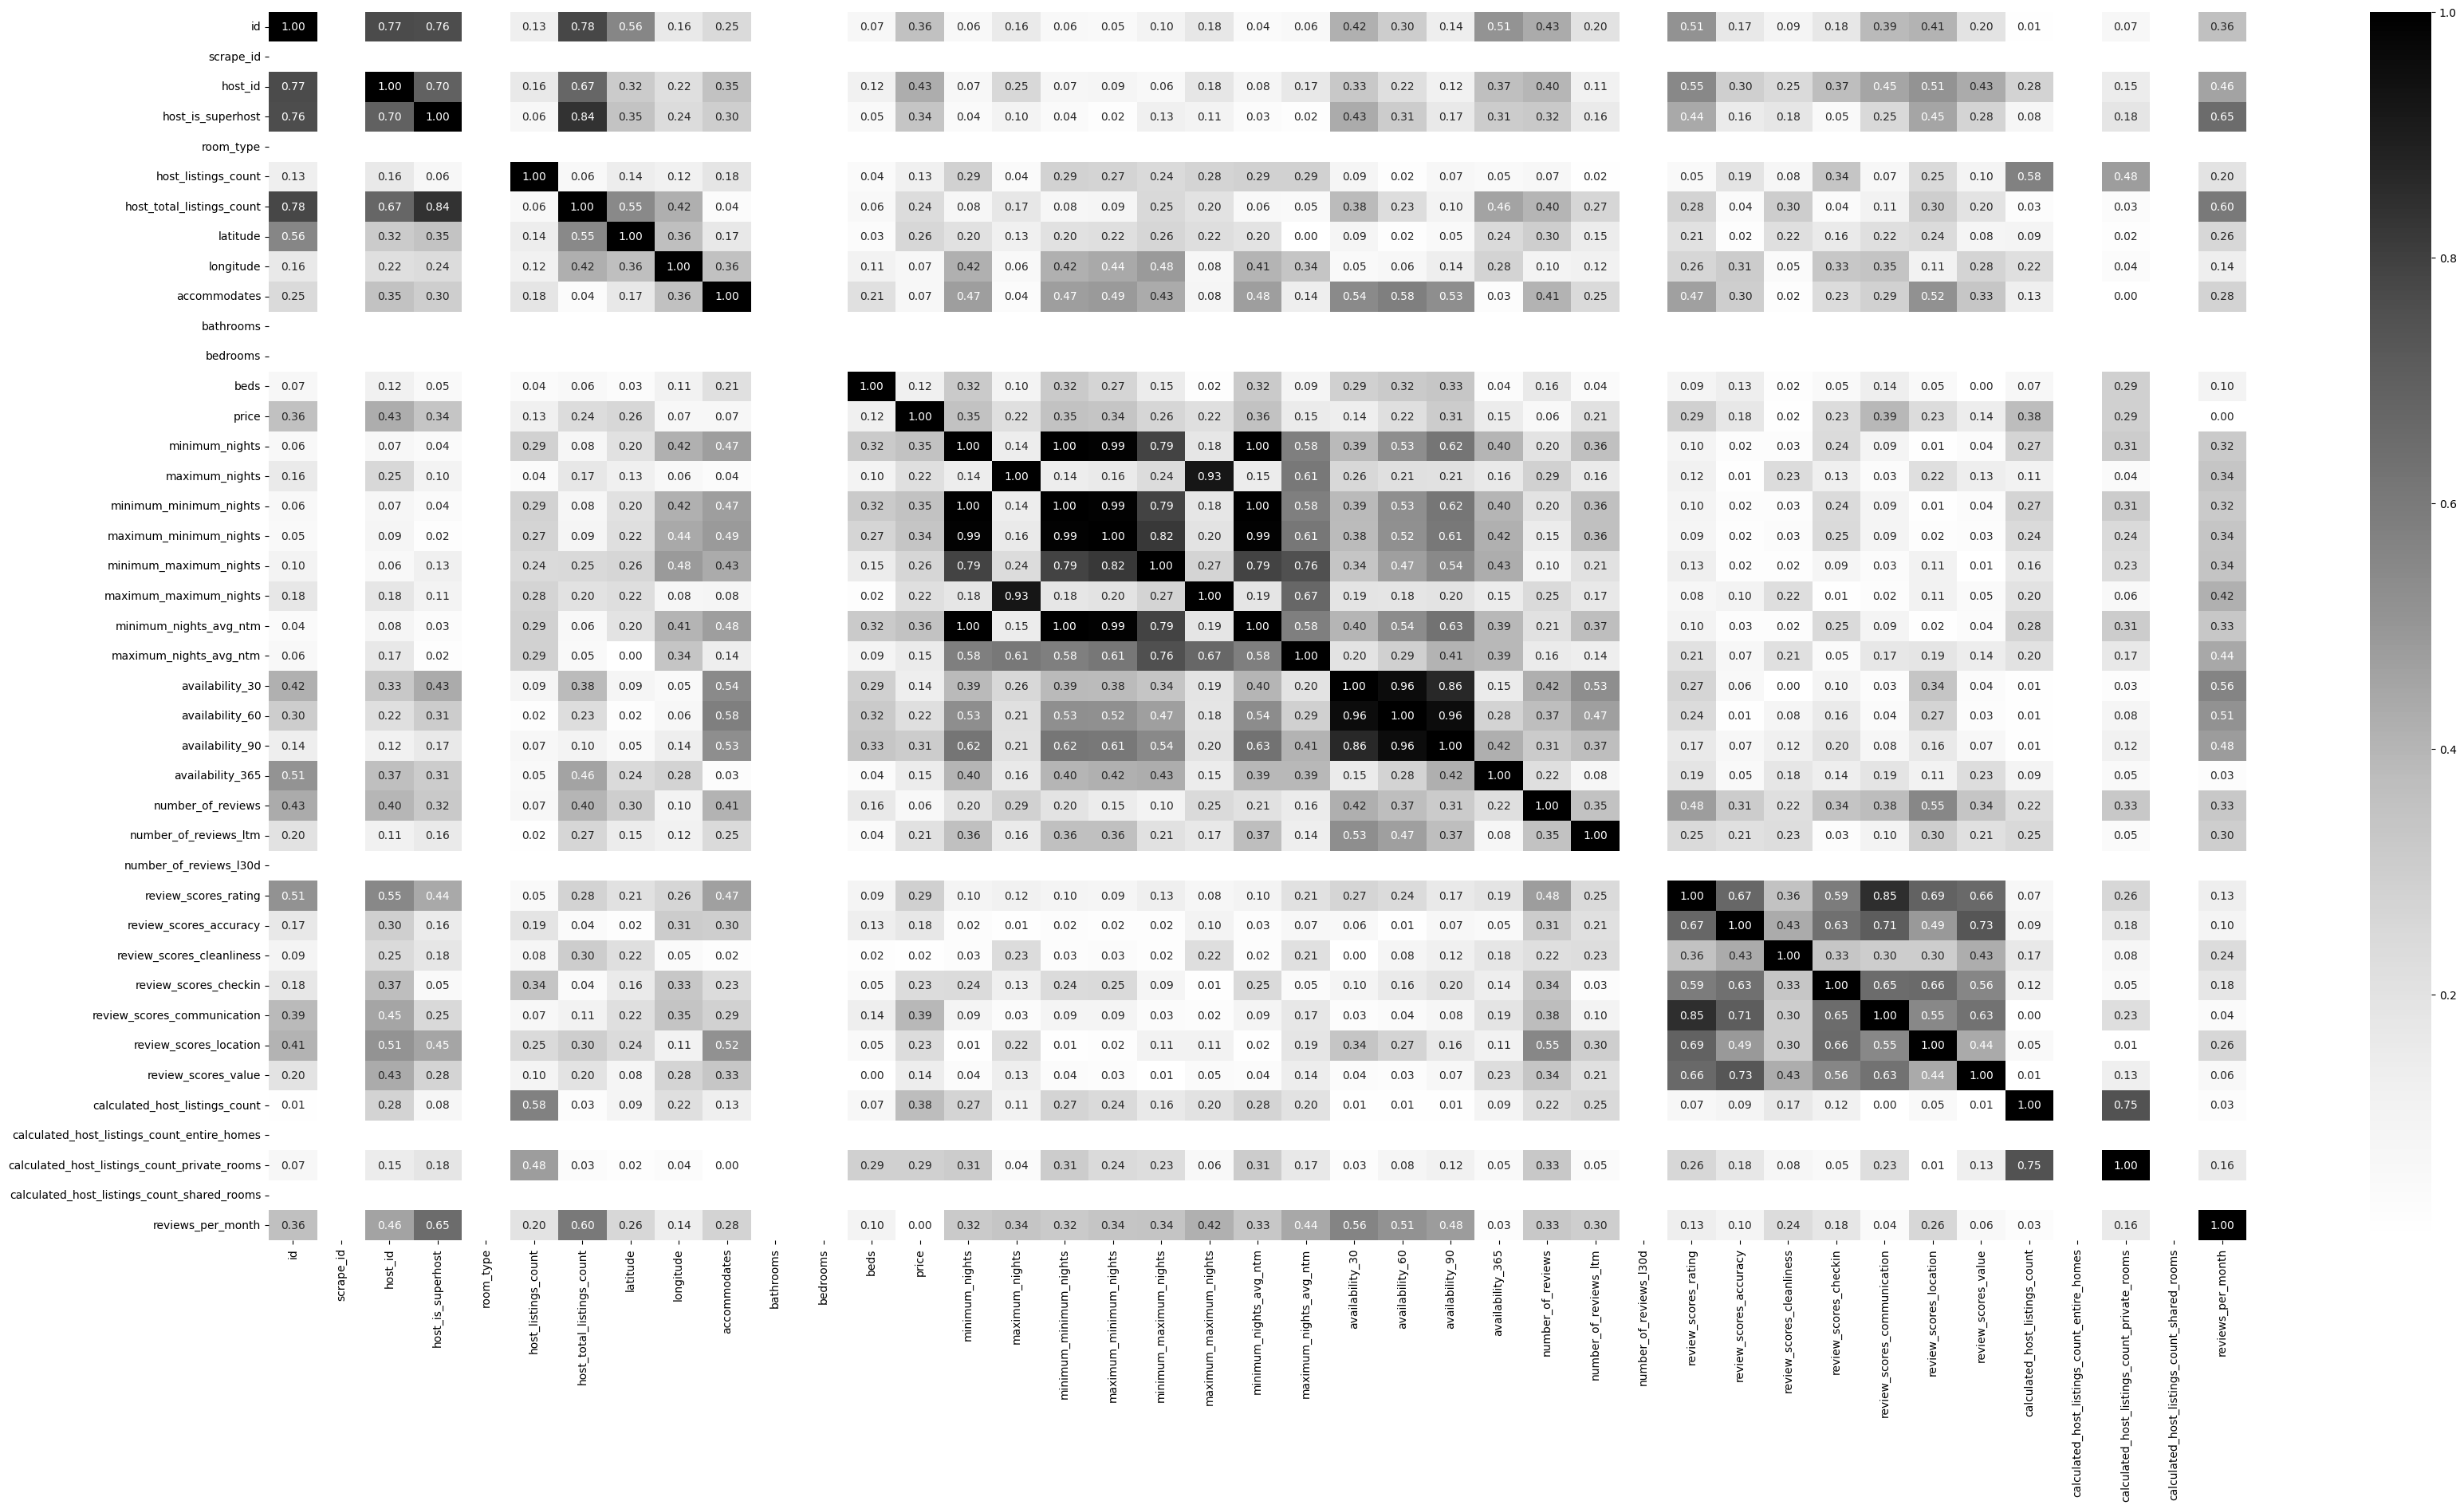

In [572]:
plt.figure(figsize=(40, 20))
Heat_Map_shared = sns.heatmap(Corr_Factors_shared, cmap="Greys", annot=True, fmt=".2f")

correlaciones de las siguientes variables (dependiente, independiente) ""Remplazar host_acceptance_rate""
1. "reviews_accuarcy vs "reviews_per_month”: 
Tiene un correlación de 0.10 lo cual es debíl
2. “review_scores_location vs review_scores_cleanliness”:
Tiene una correlación de 0.30 lo cual es debíl 
3. “Number of reviews vs price”:
Tiene una correlación de 0.06 lo cual es muy debíl
4. “availability_365 vs number_of_reviews”:
Tiene una correlación de 0.22 lo cual es muy debíl
5. “reviews score value vs number_of_reviews ”:
Tiene una correlación de 0.55 lo cual es moderada
6. “reviews_per_month vs review_scores_communication”:
Tiene una correlación de 0.04 lo que es debíl casi nula

In [573]:
## Mejor modelo ## 
#Escogí esta variable porque tiene tres coeficientes muy altos.
Vars_Indep= shared_df[["minimum_minimum_nights", "minimum_nights","maximum_nights"]]
Var_Dep= shared_df["maximum_minimum_nights"]

In [574]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [575]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.9822659536207387
El coeficiente de correlación es 0.9910933122671843


El modelo es muy bueno ya que cuenta con una correlación de 0.99 muy cercana al 1. 

mejores correlaciones
1. minimum_minimum_nights  maximum_minimum_nights    0.99
2. maximum_minimum_nights  minimum_minimum_nights    0.99
3. minimum_nights          maximum_minimum_nights    0.99
4. maximum_minimum_nights  minimum_nights            0.99
5. minimum_nights_avg_ntm  maximum_minimum_nights    0.99
6. availability_30         availability_60           0.96
7. availability_60         availability_30           0.96
8. availability_90         availability_60           0.96
9. maximum_nights          maximum_maximum_nights    0.93
10. maximum_maximum_nights  maximum_nights            0.93

### Mejor modelo multiple para las variables host_id, host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month ###

# host_id
La mejor correlación es id 0.77

In [576]:
Vars_Indep= shared_df[["id", "host_is_superhost","host_total_listings_count"]]
Var_Dep= shared_df["host_id"]

In [577]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [578]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.5883724063543415
El coeficiente de correlación es 0.7670543698815238


La correlación se quedó practicamente igual, pero es una correlación buena. 

# host_is_superhost
La correlación más alta es host_total_listings_count 0.84

In [579]:
Vars_Indep= shared_df[["host_total_listings_count", "id","host_id"]]
Var_Dep= shared_df["host_is_superhost"]

In [580]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [581]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.6104605312556705
El coeficiente de correlación es 0.7813197368911593


El coeficiente bajó de 0.84 a 78 por lo que no se recomienda hacer un modelo multiple en este caso

# host_total_listings_count

In [582]:
Vars_Indep= shared_df[["host_is_superhost", "id","host_id"]]
Var_Dep= shared_df["host_total_listings_count"]

In [583]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [584]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.6224354136835313
El coeficiente de correlación es 0.7889457609262701


El coeficiente bajó de 0.34 a 0.79 por lo que no se recomienda hacer un modelo multiple en este caso

# room_type 
No se puede hacer un modelo en esta columna porque no hay correlaciones

# accommodates
La correlación mas alta es availability_60 0.58

In [585]:
Vars_Indep= shared_df[["availability_60", "availability_30","availability_90"]]
Var_Dep= shared_df["accommodates"]

In [586]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [587]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.3788592780667601
El coeficiente de correlación es 0.6155154572118885


El coeficiente mejoró de 0.58 a 0.61 lo que es un coeficiente bueno

# bedrooms
No se puede hacer un modelo en esta columna porque no hay correlaciones

# Price
La mejor correlación es host_id 0.43

In [588]:
Vars_Indep= shared_df[["host_id", "review_scores_communication","calculated_host_listings_count"]]
Var_Dep= shared_df["price"]

In [589]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [590]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.32503691802293977
El coeficiente de correlación es 0.5701200908781761


El modelo mejoró bastante de 0.43 a 0.57, lo que es una correlación moderada

# review_scores_value 
La mejor correlación es review_scores_accuracy 0.73

In [591]:
Vars_Indep= shared_df[["review_scores_accuracy", "review_scores_rating","review_scores_communication"]]
Var_Dep= shared_df["review_scores_value"]

In [592]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [593]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.5918890567567326
El coeficiente de correlación es 0.7693432632815684


El modelo mejoró de 0.73 a 0.76 una ligera mejora y la correlación es buena.

# reviews_per_month
La mejor correlación es host_is_superhost 0.65

In [594]:
Vars_Indep= shared_df[["host_is_superhost", "host_total_listings_count","availability_30"]]
Var_Dep= shared_df["reviews_per_month"]

In [595]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [596]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.5311803934948771
El coeficiente de correlación es 0.7288212356228907


El modelo obtuvó una correlación de 0.72 mejo que la simple de 0.65. Además 0.72 es una buena correlación

## number_of_reviews remplazando host_acceptance_rate
La mejor correlación es review_scores_location 0.55

In [597]:
Vars_Indep= shared_df[["review_scores_location", "review_scores_rating","id"]]
Var_Dep= shared_df["number_of_reviews"]

In [598]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [599]:
coef_Deter=model.score(Vars_Indep,Var_Dep)
print("El coeficiente de determinacion es",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("El coeficiente de correlación es",coef_Correl)

El coeficiente de determinacion es 0.18707808928631453
El coeficiente de correlación es 0.4325252469929525


El coeficiente bajó de 0.55 a 0.43 por lo ue no se recomienda un modelo multiple